# CSYE 7245 - Big-Data Systems and Intelligence Analytics¶
## Assignment 1

### Part A Cleaning and EDA

### About the Data 
#### Data Source:  The data has been collected from the NASA Open API available [here](https://api.nasa.gov/api.html#NeoWS)
##### The data is about Asteroids - NeoWs

NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/).
This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

| Data Type           |Number of columns |      
| ------------------- |:----------------:| 
| ID                  | 2                | 
| Continuous          | 30               |
| Categorical         | 2                |
| DateTime            | 2                |
| Nominal             | 1                |

Raw Data: API

Transformed/Wrangled data: Comma Separated Values(.csv)


In [2]:
import requests #import requests library
import json,os,datetime
import csv
import pandas as pd
from pandas import DataFrame #reading data as tables
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns #for beautiful plots
%matplotlib inline

In [3]:
nasa_api_key=os.getenv('nasa') # importing the key into the environment variable
path_to_folder="Raw_Data" #path to the destination folder for json
print(nasa_api_key)

None


In [ ]:
# data collected using NASA Open API 
headers1={'user-key' : nasa_api_key}
read_rest=[]
rest_list=[]
for i in range(1,200):
    read_rest=[]
    rests_url=('https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-01-01&end_date=2015-01-07&api_key=TTrfbTaxY4GIPaX7mk45iPrKrR89WY3jXqGYRx4t')# fetching the data from this url    
    get_request = requests.get(rests_url,headers=headers1)
    read_rest=json.loads(get_request.text)#loading the data fetched to an obejct
    rest_list.append(read_rest)
rest_list

import pprint

pp = pprint.PrettyPrinter(indent=3)
#pp.pprint(read_rest)

In [5]:
# each json file in 
path_file=os.path.join(path_to_folder,'file1'+ '.json') #collection of the raw data into json file
with open(path_file,'w') as jsonfile:
    json.dump(read_rest,jsonfile) #dumping the data into json file

#### Processing the data and storing as json in the path

In [6]:
path_to_folder='Raw_Data'
json_files = [pos_json for pos_json in os.listdir(path_to_folder) if pos_json.endswith('.json')] #looping in the folder "data" where the the json files are placed 
#print (json_files)

In [35]:
with open('nasa.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Neo Reference ID','Name','Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)','Est Dia in M(min)', 'Est Dia in M(max)',
                        'Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)',
                        'Close Approach Date','Epoch Date Close Approach','Relative Velocity km per sec','Relative Velocity km per hr','Miles per hour',
                        'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)','Orbiting Body',
                        'Orbit ID','Orbit Determination Date','Orbit Uncertainity','Minimum Orbit Intersection','Jupiter Tisserand Invariant',
                        'Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period',
                        'Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion','Equinox','Hazardous']) 

    for json_file in json_files:
        date = json_file[4:-5]
        with open(os.path.join(path_to_folder, json_file),'r', encoding='utf-8', errors="ignore") as json_file: #append the path of file to the source folde   
            data = json.load(json_file,strict=False)
            for p in range(0,100):
                try:
                    name = data["near_earth_objects"][date][p]["name"]
                    path = data["near_earth_objects"][date][p]
                    try:
                        for q in range(0,10):
                            
                            absolute_magnitude_h = path["absolute_magnitude_h"]
                            
                            est_dia_km_min=path["estimated_diameter"]["kilometers"]['estimated_diameter_min']
                            est_dia_km_max=path["estimated_diameter"]["kilometers"]['estimated_diameter_max']
                            
                            est_dia_m_min=path["estimated_diameter"]["meters"]['estimated_diameter_min']
                            est_dia_m_max=path["estimated_diameter"]["meters"]['estimated_diameter_max']

                            est_dia_miles_min=path["estimated_diameter"]["miles"]['estimated_diameter_min']
                            est_dia_miles_max=path["estimated_diameter"]["miles"]['estimated_diameter_max']

                            est_dia_ft_min=path["estimated_diameter"]["feet"]['estimated_diameter_min']
                            est_dia_ft_max=path["estimated_diameter"]["feet"]['estimated_diameter_max']

                            is_potentially_hazardous_asteroid = path["is_potentially_hazardous_asteroid"]

                            close_approach_date = path['close_approach_data'][q]['close_approach_date']
                            epoch_date_close_app=path['close_approach_data'][q]['epoch_date_close_approach']
                            rel_vel_km_sec=path['close_approach_data'][q]['relative_velocity']['kilometers_per_second']
                            rel_vel_km_hour=path['close_approach_data'][q]['relative_velocity']['kilometers_per_hour']
                            rel_vel_miles_hr=path['close_approach_data'][q]['relative_velocity']['miles_per_hour']

                            miss_dis_ast=path['close_approach_data'][q]["miss_distance"]['astronomical']
                            miss_dis_lun=path['close_approach_data'][q]["miss_distance"]['lunar']
                            miss_dis_km=path['close_approach_data'][q]["miss_distance"]['kilometers']
                            miss_dis_miles=path['close_approach_data'][q]["miss_distance"]['miles']
                            neo_ref_id=name = path["neo_reference_id"]
                            orb_body=path['close_approach_data'][q]["orbiting_body"]
                            
                            orb_id=path['orbital_data']['orbit_id']
                            orbit_determination_date=path['orbital_data']['orbit_determination_date']
                            orbit_uncertainty=path['orbital_data']['orbit_uncertainty']
                            minimum_orbit_intersection=path['orbital_data']['minimum_orbit_intersection']
                            jupiter_tisserand_invariant=path['orbital_data']['jupiter_tisserand_invariant']
                            epoch_osculation=path['orbital_data']['epoch_osculation']
                            eccentricity=path['orbital_data']['eccentricity']
                            semi_major_axis=path['orbital_data']['semi_major_axis']
                            inclination=path['orbital_data']['inclination']
                            ascending_node_longitude=path['orbital_data']['ascending_node_longitude']
                            orbital_period=path['orbital_data']['orbital_period']
                            perihelion_distance=path['orbital_data']['perihelion_distance']
                            perihelion_argument=path['orbital_data']['perihelion_argument']
                            aphelion_distance=path['orbital_data']['aphelion_distance']
                            perihelion_time=path['orbital_data']['perihelion_time']
                            mean_anomaly=path['orbital_data']['mean_anomaly']
                            mean_motion=path['orbital_data']['mean_motion']
                            equinox=path['orbital_data']['equinox']
                            writer.writerow([neo_ref_id,name,absolute_magnitude_h,est_dia_km_min,est_dia_km_max,est_dia_m_min,est_dia_m_max,est_dia_miles_min,est_dia_miles_max,
                                                         est_dia_ft_min,est_dia_ft_max,close_approach_date,epoch_date_close_app,rel_vel_km_sec,rel_vel_km_hour,
                                                         rel_vel_miles_hr,miss_dis_ast,miss_dis_lun,miss_dis_km,miss_dis_miles,
                                                         orb_body,orb_id,orbit_determination_date,orbit_uncertainty,minimum_orbit_intersection,
                                                         jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,
                                                         inclination,ascending_node_longitude,orbital_period,perihelion_distance,
                                                         perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,
                                                         equinox,is_potentially_hazardous_asteroid])
                          
                    except:
                        pass
                except:
                    pass

#### Reading data into the notebook from the csv

In [36]:
nasa_data=pd.read_csv('nasa.csv')
nasa_data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


#### Data Cleaning
* Are there missing values?


In [37]:
nasa_data.isnull().head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
for col in nasa_data.columns:
    print('Length of column'+" "+col+"=",len(nasa_data[col]))

Length of column Neo Reference ID= 4687
Length of column Name= 4687
Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Est Dia in M(min)= 4687
Length of column Est Dia in M(max)= 4687
Length of column Est Dia in Miles(min)= 4687
Length of column Est Dia in Miles(max)= 4687
Length of column Est Dia in Feet(min)= 4687
Length of column Est Dia in Feet(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Relative Velocity km per hr= 4687
Length of column Miles per hour= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Miss Dist.(lunar)= 4687
Length of column Miss Dist.(kilometers)= 4687
Length of column Miss Dist.(miles)= 4687
Length of column Orbiting Body= 4687
Length of column Orbit ID= 4687
Length of column Orbit Determination Date= 4687
Length of column Orb

#### Observation: 
From the above we can see that there is no missing data or null values in the collected data. Additionally, the length of each column is same.

* Are there inappropriate values?


In [39]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

#### Observation:
From the information above, there are no inappropriate values in the data

* Remove or impute any bad data. 

In [40]:
# we can usually interpolate the missing values, if there are any
nasa_data.interpolate()
nasa_data.sample(1000) #random sample of 1000 rows

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
1162,3114033,3114033,26.900,0.011080,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,...,140.359093,996.649265,0.540846,264.895408,3.364498,2.452268e+06,17.769960,0.361210,J2000,False
1739,3256327,3256327,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,205.323709,397.324144,0.741707,347.702301,1.373702,2.457841e+06,144.716735,0.906061,J2000,False
4384,2216523,2216523,20.600,0.201630,0.450858,201.629919,450.858206,0.125287,0.280150,661.515505,...,205.242573,319.089304,0.537258,211.130108,1.290446,2.456373e+06,330.298455,1.128211,J2000,True
1154,2373579,2373579,18.700,0.483676,1.081534,483.676488,1081.533507,0.300543,0.672034,1586.865170,...,95.568444,635.696146,0.968719,91.139885,1.925051,2.458056e+06,328.374080,0.566308,J2000,False
1639,3744560,3744560,28.500,0.005303,0.011859,5.303407,11.858779,0.003295,0.007369,17.399631,...,146.524761,307.534496,0.601928,232.776658,1.181383,2.457970e+06,35.514989,1.170600,J2000,False
1605,3574593,3574593,23.000,0.066766,0.149293,66.765941,149.293183,0.041486,0.092766,219.048371,...,121.899883,506.574618,1.025464,279.842152,1.461828,2.457901e+06,70.465241,0.710655,J2000,False
424,3648873,3648873,22.600,0.080270,0.179490,80.270317,179.489885,0.049878,0.111530,263.354066,...,22.625122,254.315104,0.405801,201.859670,1.165330,2.458017e+06,337.329406,1.415567,J2000,False
1204,3333489,3333489,22.200,0.096506,0.215794,96.506147,215.794305,0.059966,0.134088,316.621227,...,237.027796,492.706125,0.642808,254.489275,1.798877,2.458240e+06,185.153087,0.730659,J2000,False
2874,3522631,3522631,24.100,0.040230,0.089958,40.230458,89.958039,0.024998,0.055897,131.989696,...,94.878195,252.819762,0.308362,296.620463,1.256605,2.455413e+06,246.414849,1.423939,J2000,False
2527,3552575,3552575,22.800,0.073207,0.163697,73.207399,163.696720,0.045489,0.101716,240.181763,...,71.561597,369.965411,0.861202,217.666658,1.155949,2.457990e+06,10.599348,0.973064,J2000,False


#### Observation:
Since, there is no bad data in the dataset so no removing or impute is required. We can check sample data using sample(), in order to check for bad or missing data. 

If there is there is any missing data or we need to impute values, we can do so by interpolating using above. 

## Data Distribution 
#### Answer the following questions for the data in each column:

* What are the summary statistics?

In [41]:
nasa_data.describe() # description of data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


* How is the data distributed?
* Write a summary of what the plot tells you.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


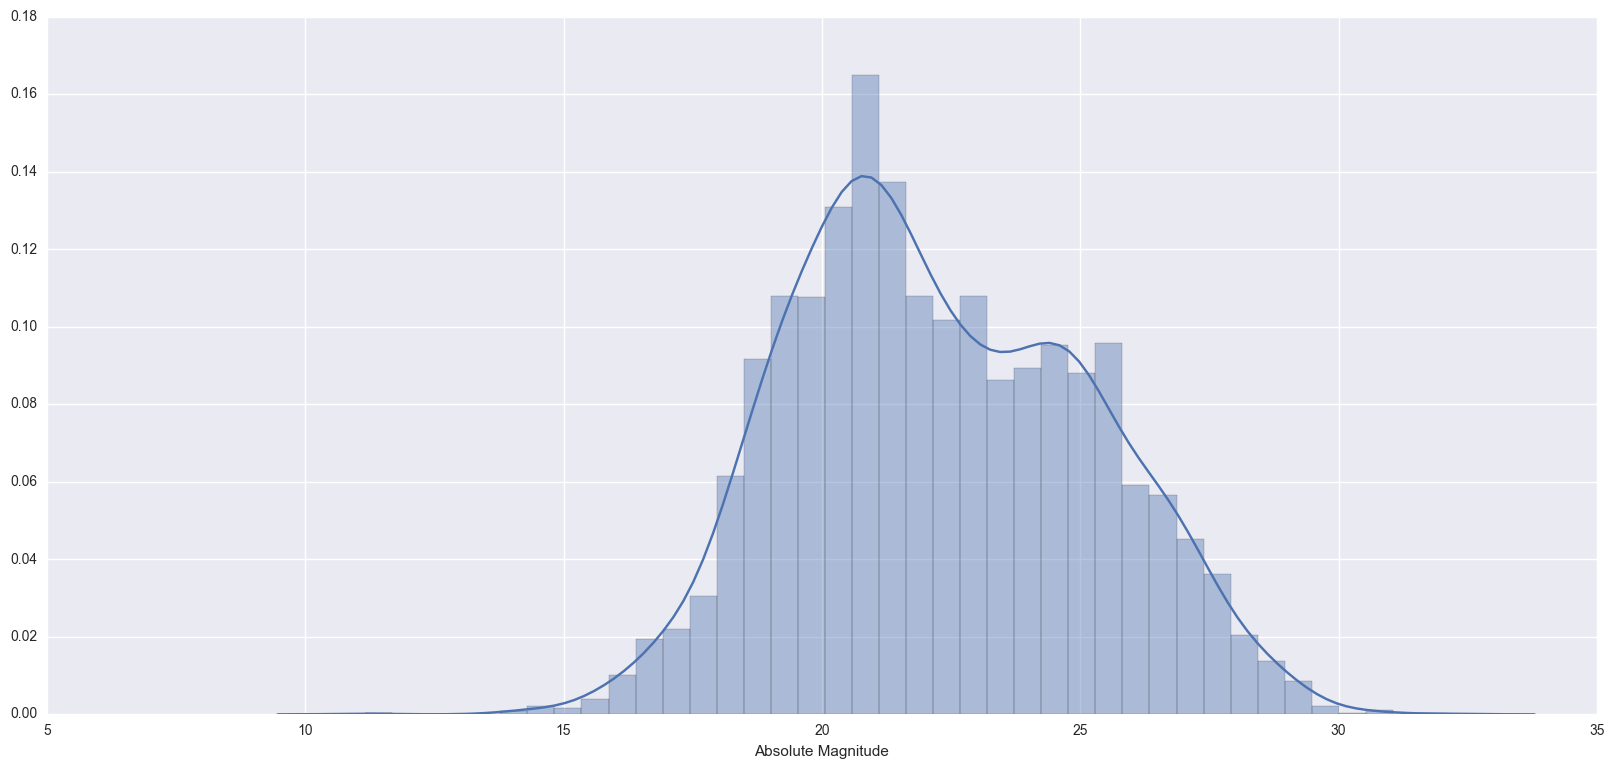

In [42]:
# Make plots larger
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(nasa_data['Absolute Magnitude'])
plt.show()

#### Observation:

This histogram is a normal distribution as it is bell shaped.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


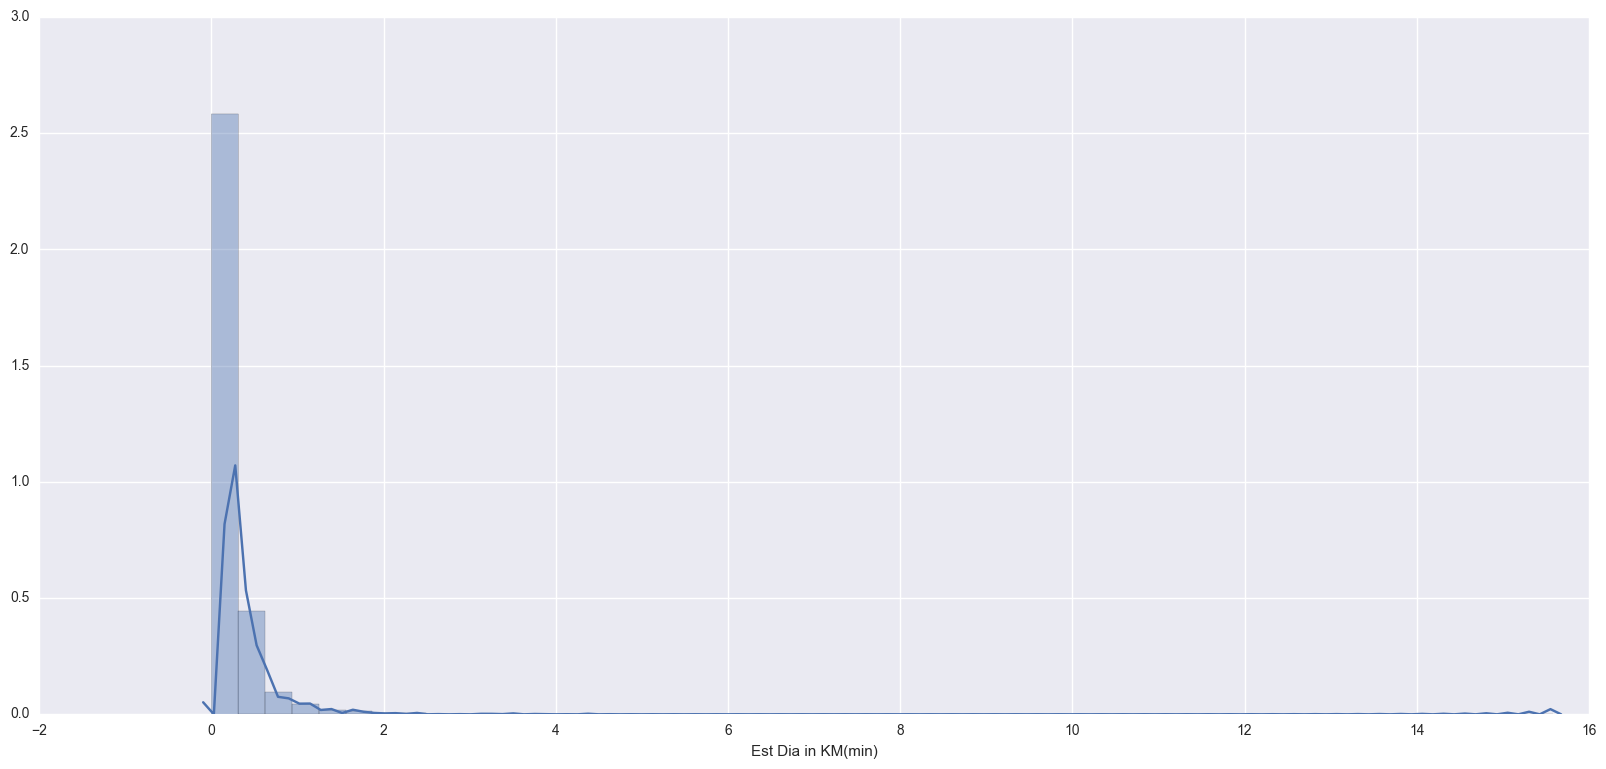

In [43]:
sns.distplot(nasa_data['Est Dia in KM(min)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


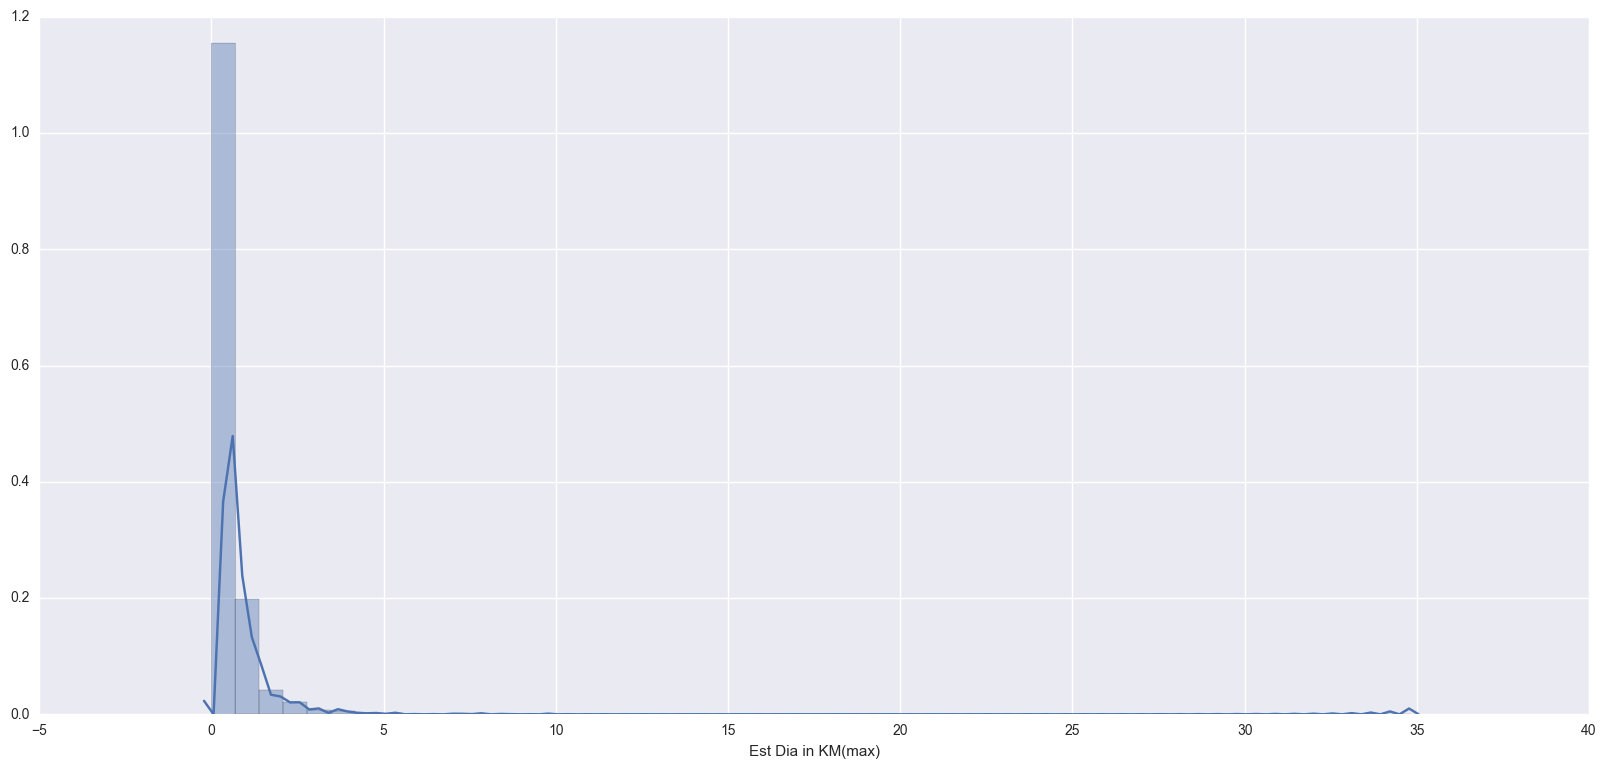

In [44]:
sns.distplot(nasa_data['Est Dia in KM(max)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


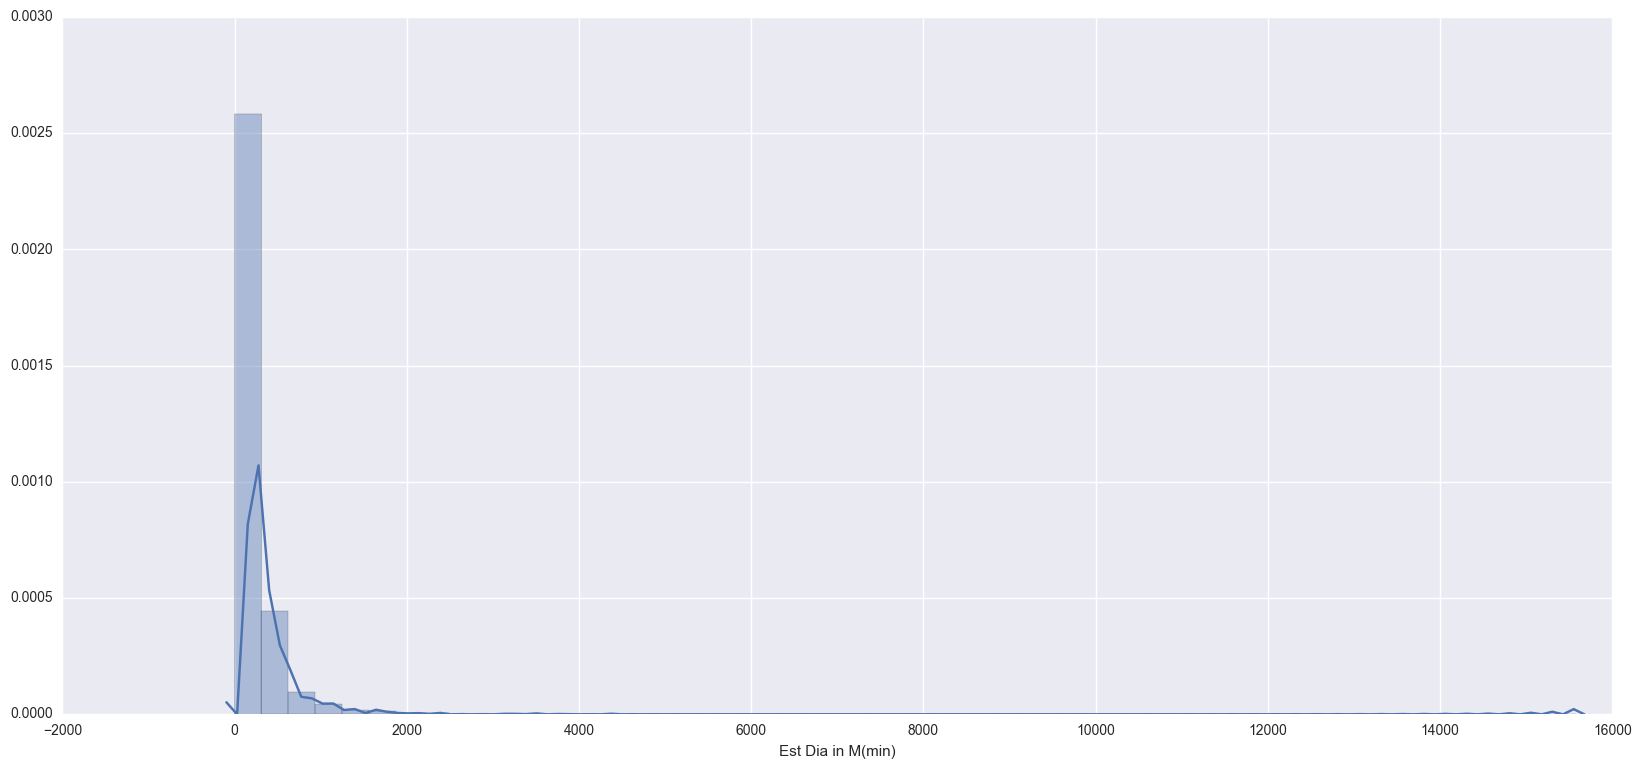

In [45]:
sns.distplot(nasa_data['Est Dia in M(min)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


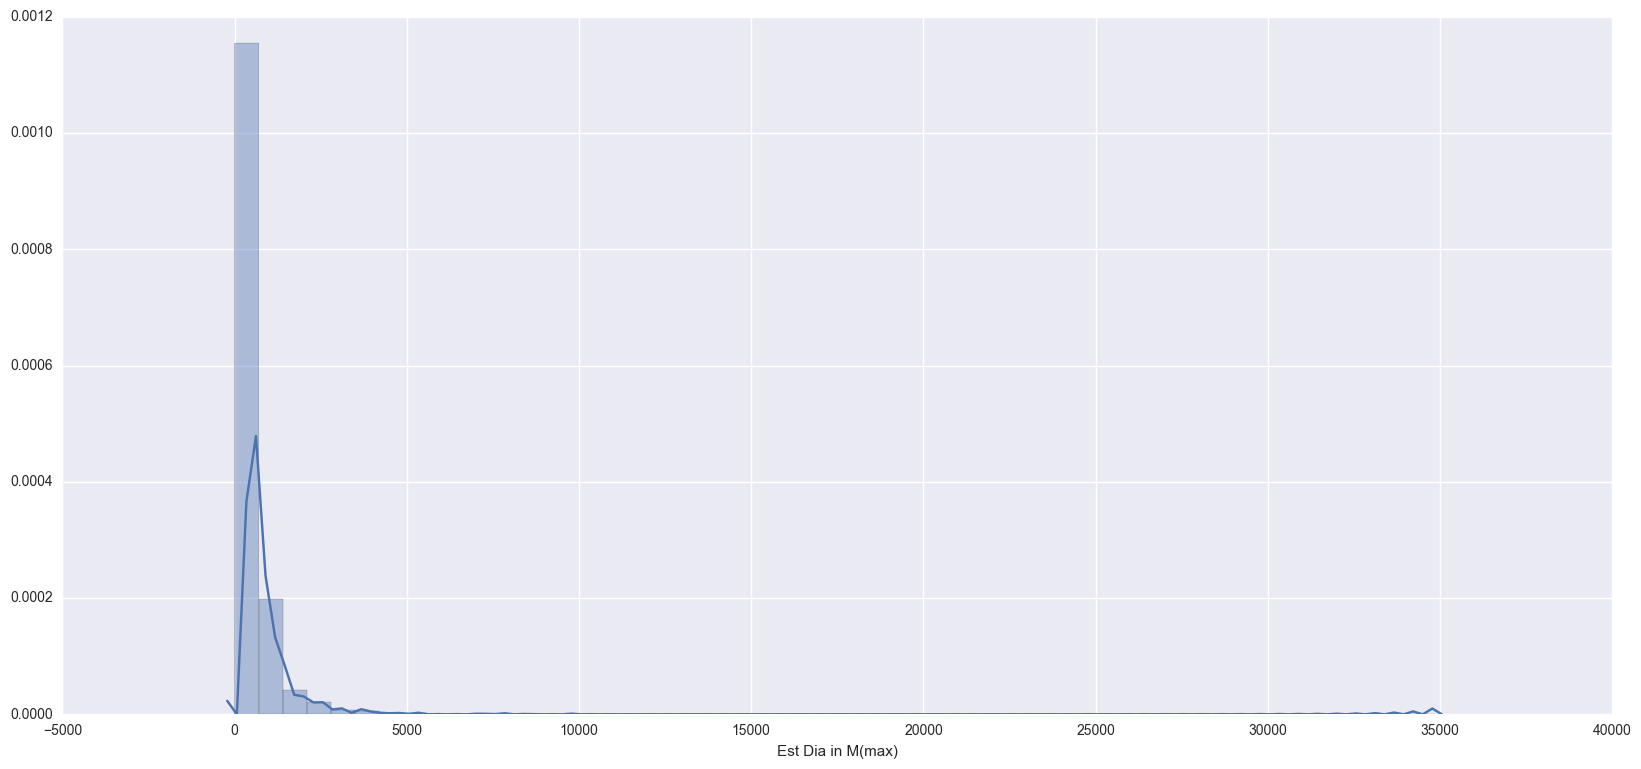

In [46]:
sns.distplot(nasa_data['Est Dia in M(max)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


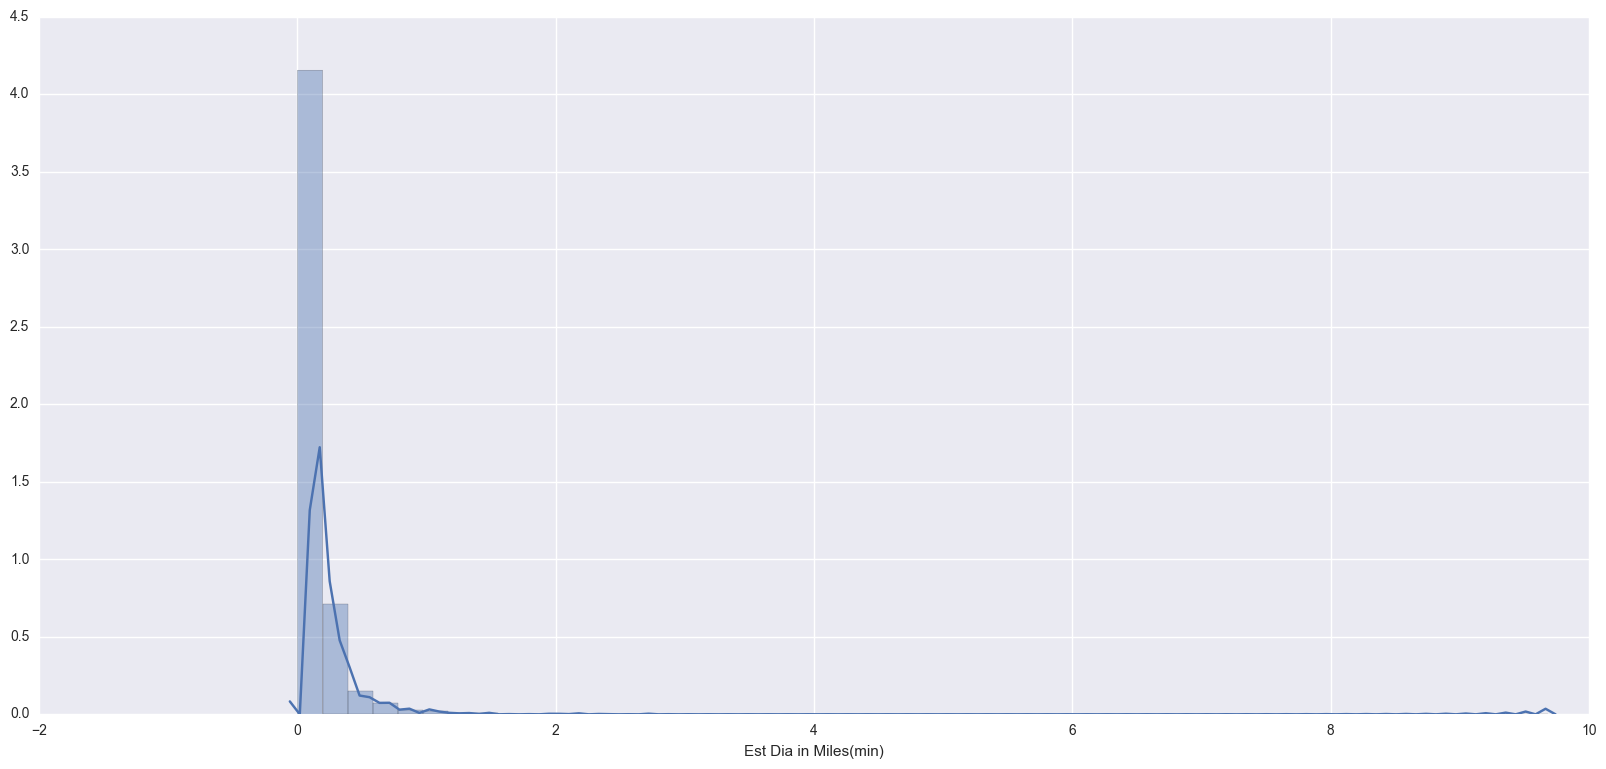

In [47]:
sns.distplot(nasa_data['Est Dia in Miles(min)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


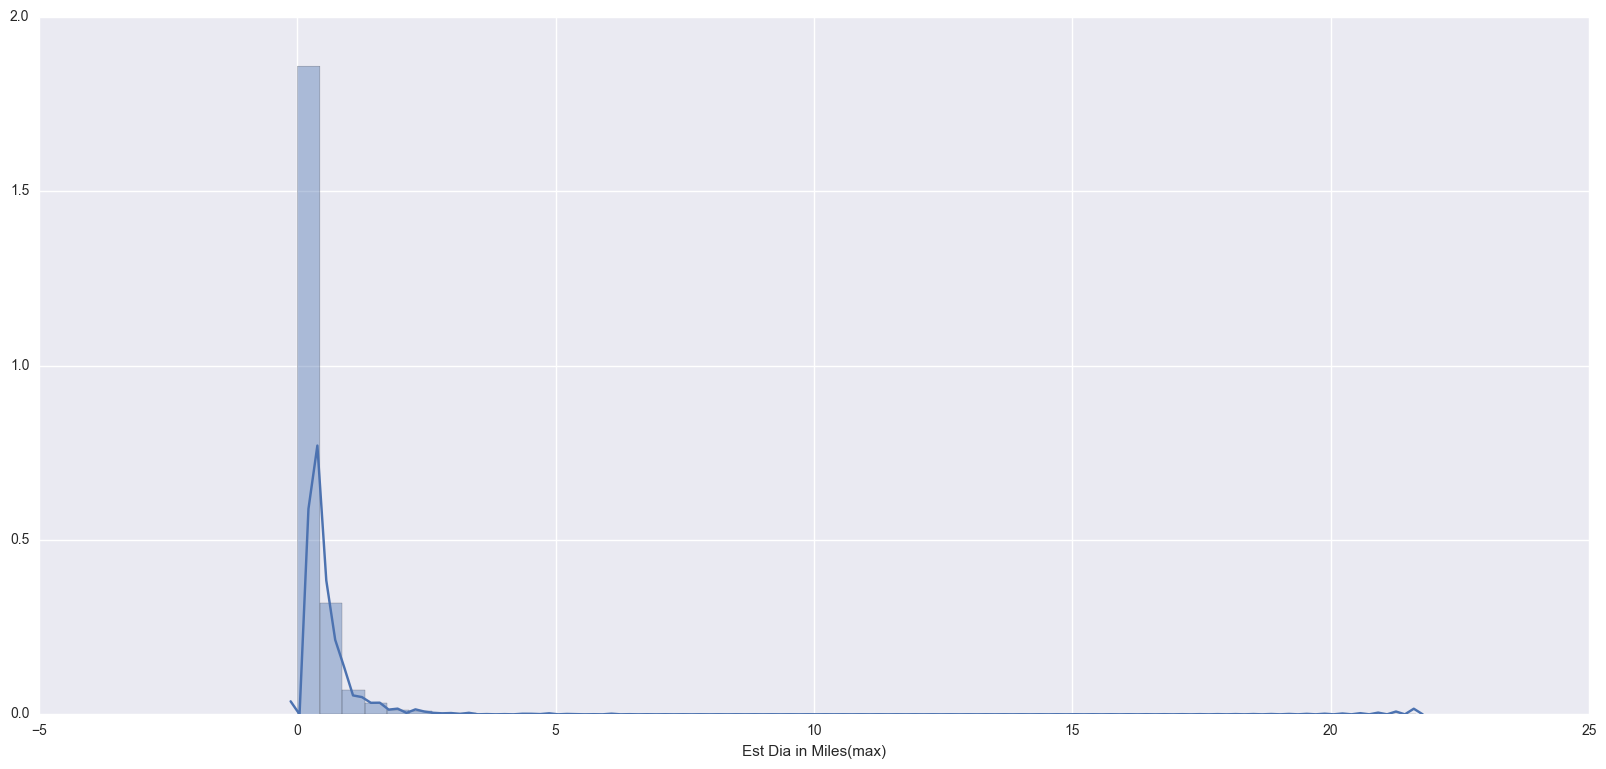

In [48]:
sns.distplot(nasa_data['Est Dia in Miles(max)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


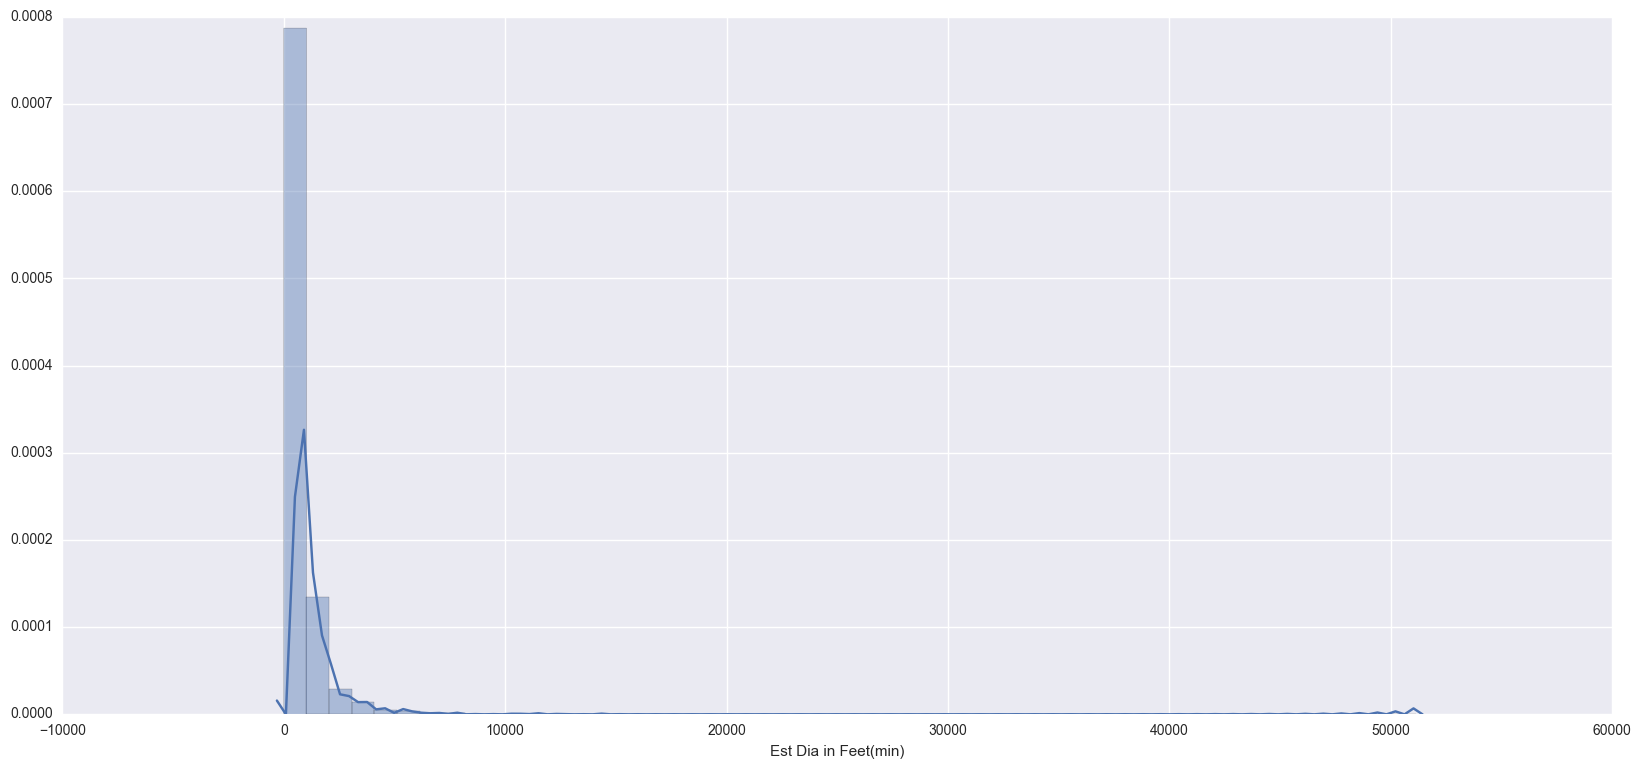

In [49]:
sns.distplot(nasa_data['Est Dia in Feet(min)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


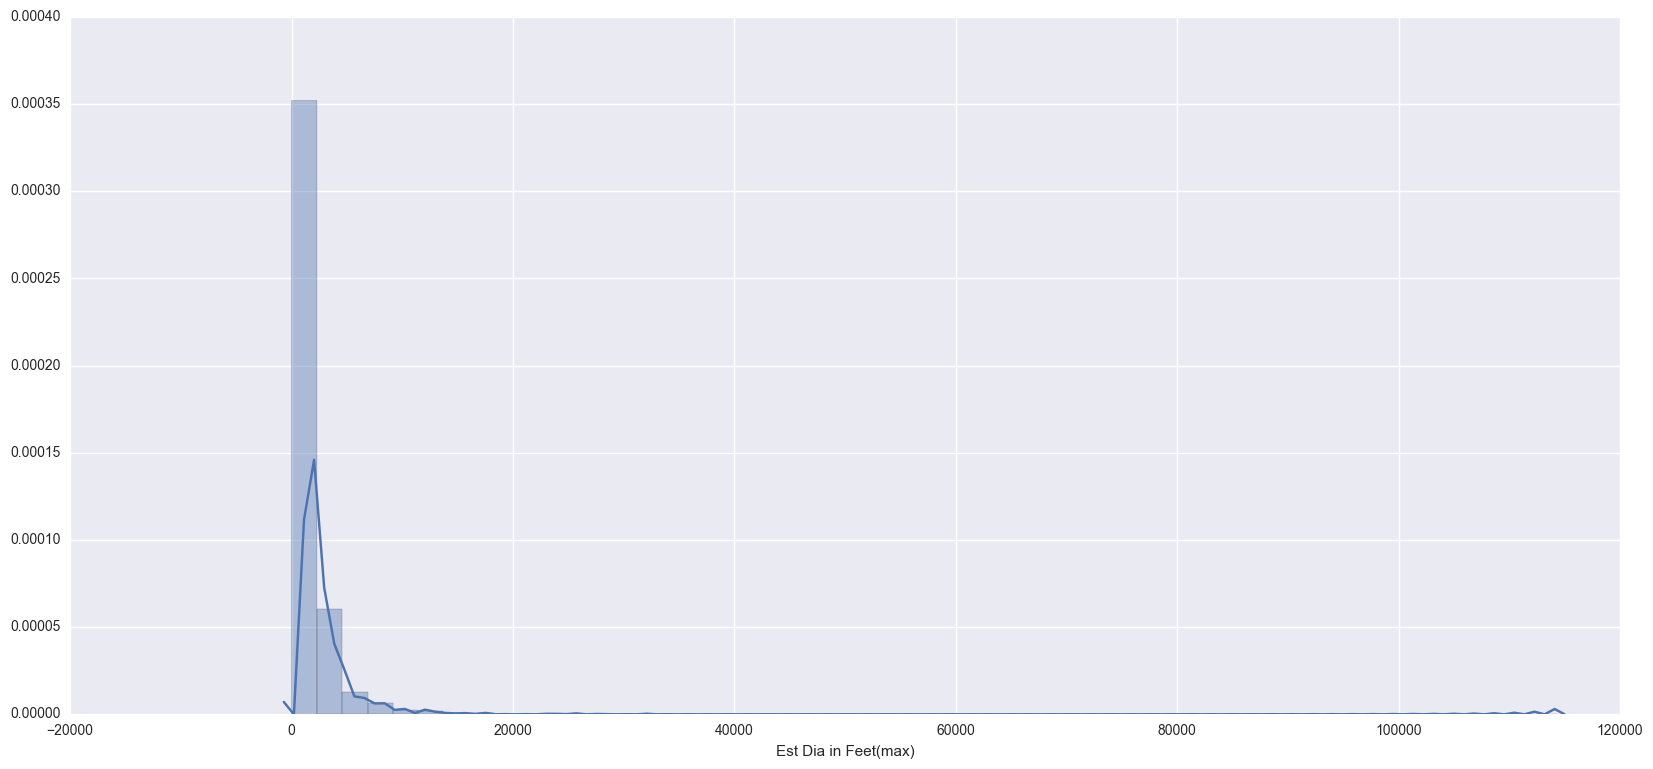

In [50]:
sns.distplot(nasa_data['Est Dia in Feet(max)'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


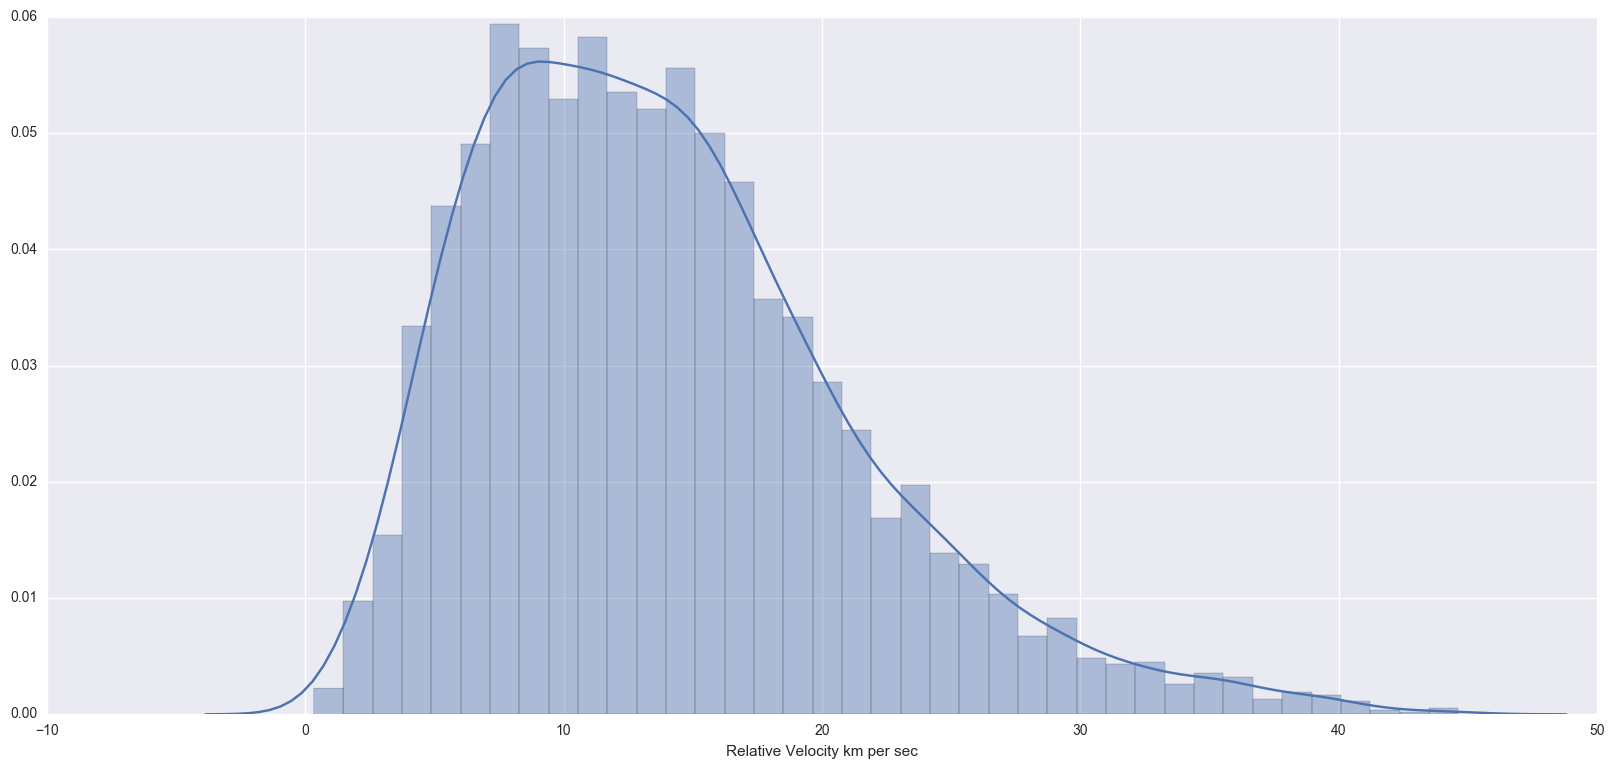

In [51]:
sns.distplot(nasa_data['Relative Velocity km per sec'])
plt.show()

#### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


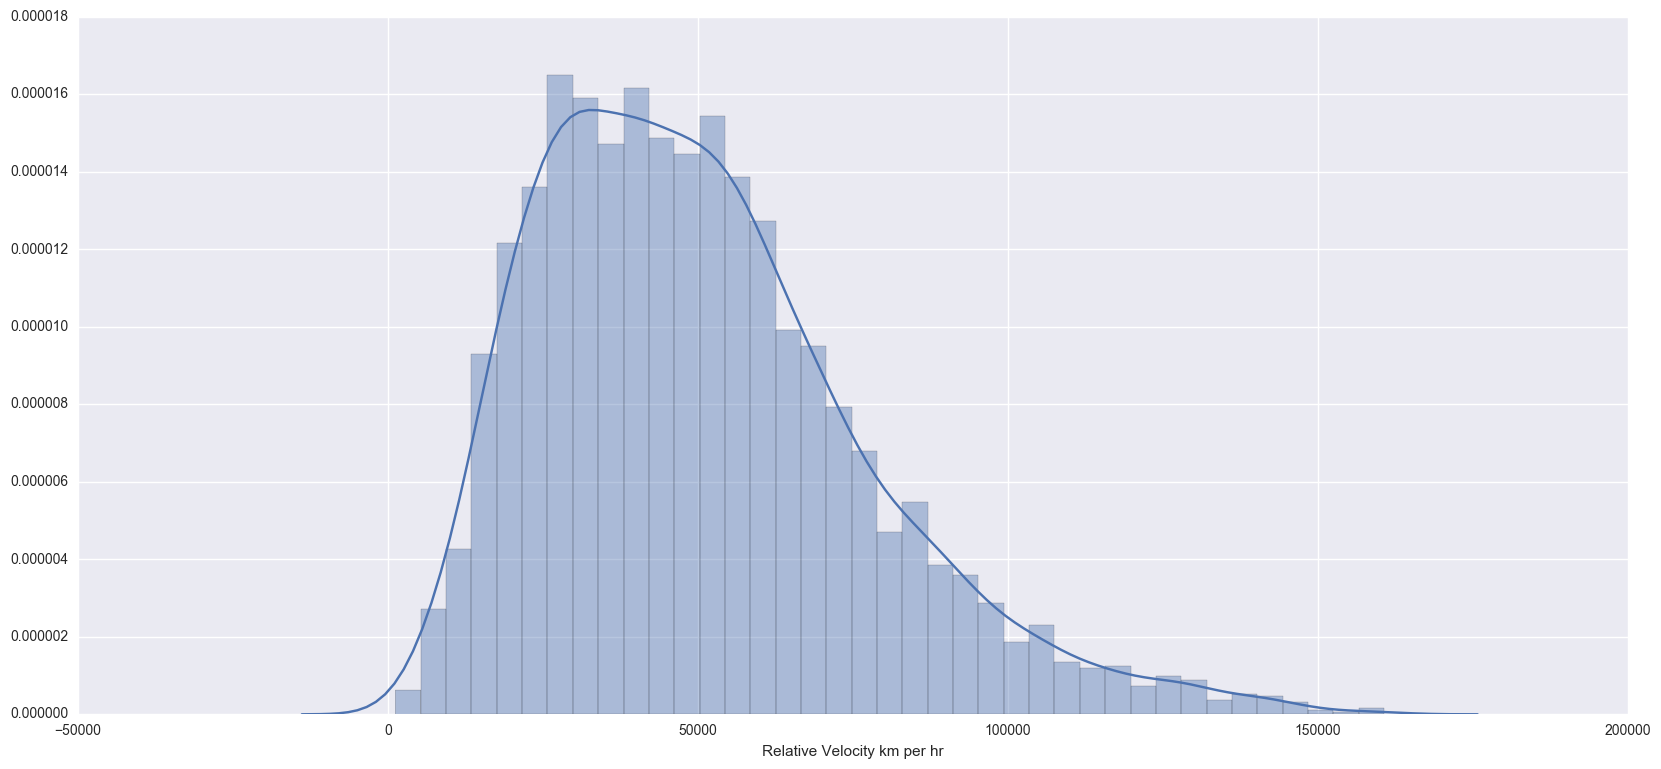

In [52]:
sns.distplot(nasa_data['Relative Velocity km per hr'])
plt.show()

#### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


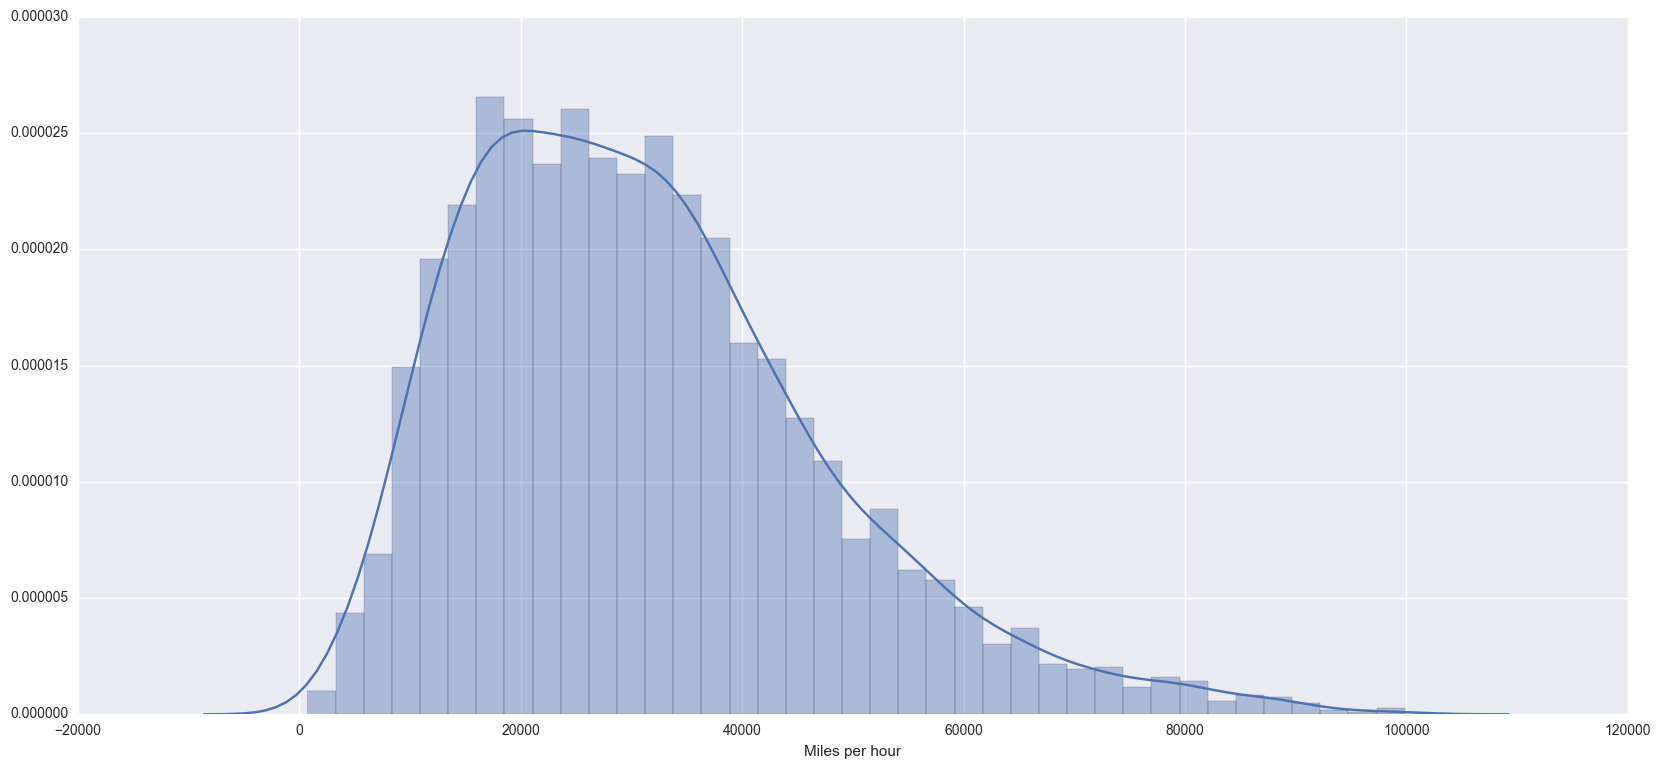

In [53]:
sns.distplot(nasa_data['Miles per hour'])
plt.show()

#### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


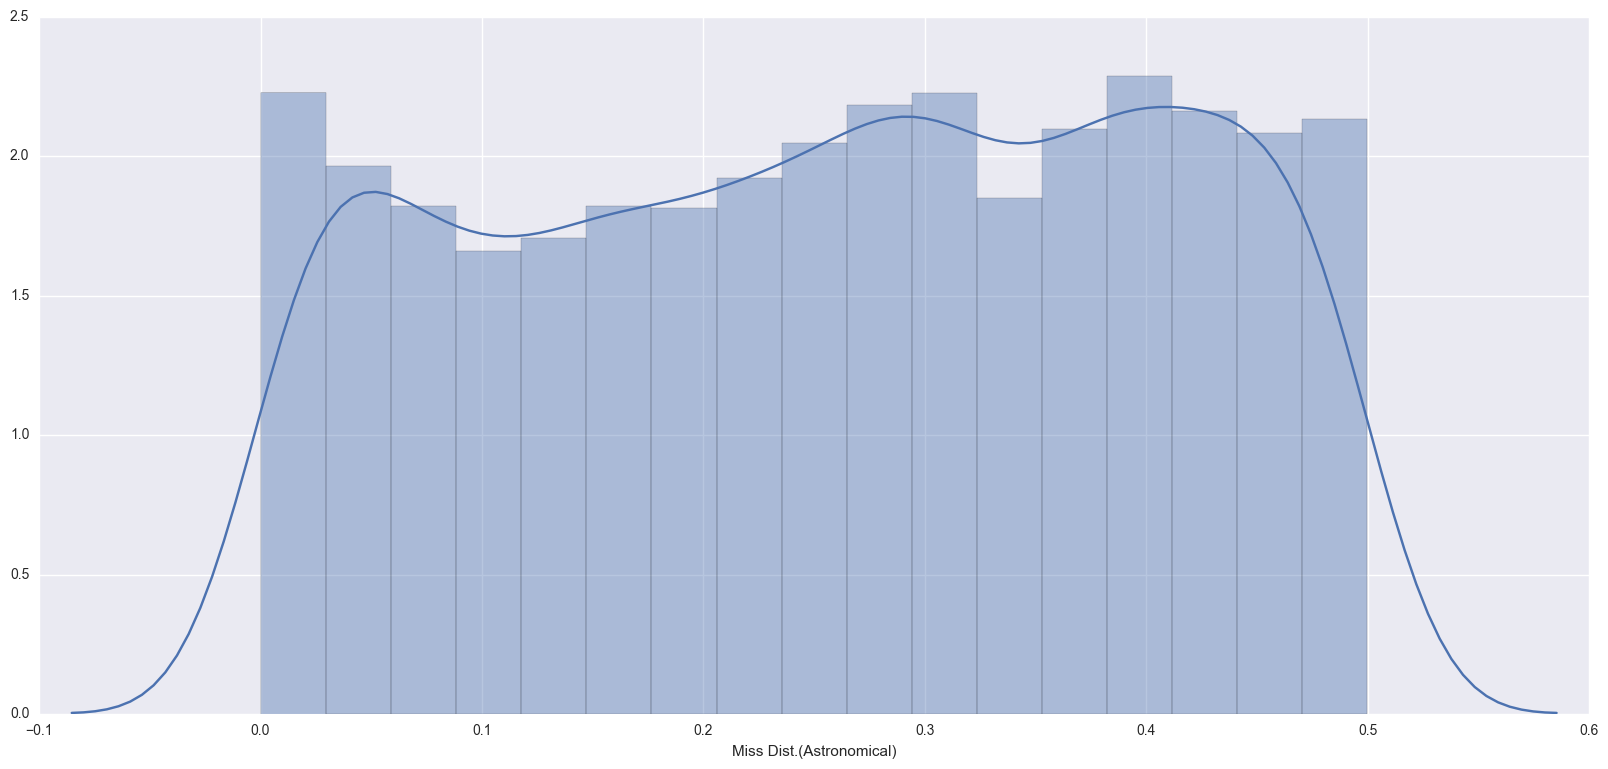

In [54]:
sns.distplot(nasa_data['Miss Dist.(Astronomical)'])
plt.show()

#### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


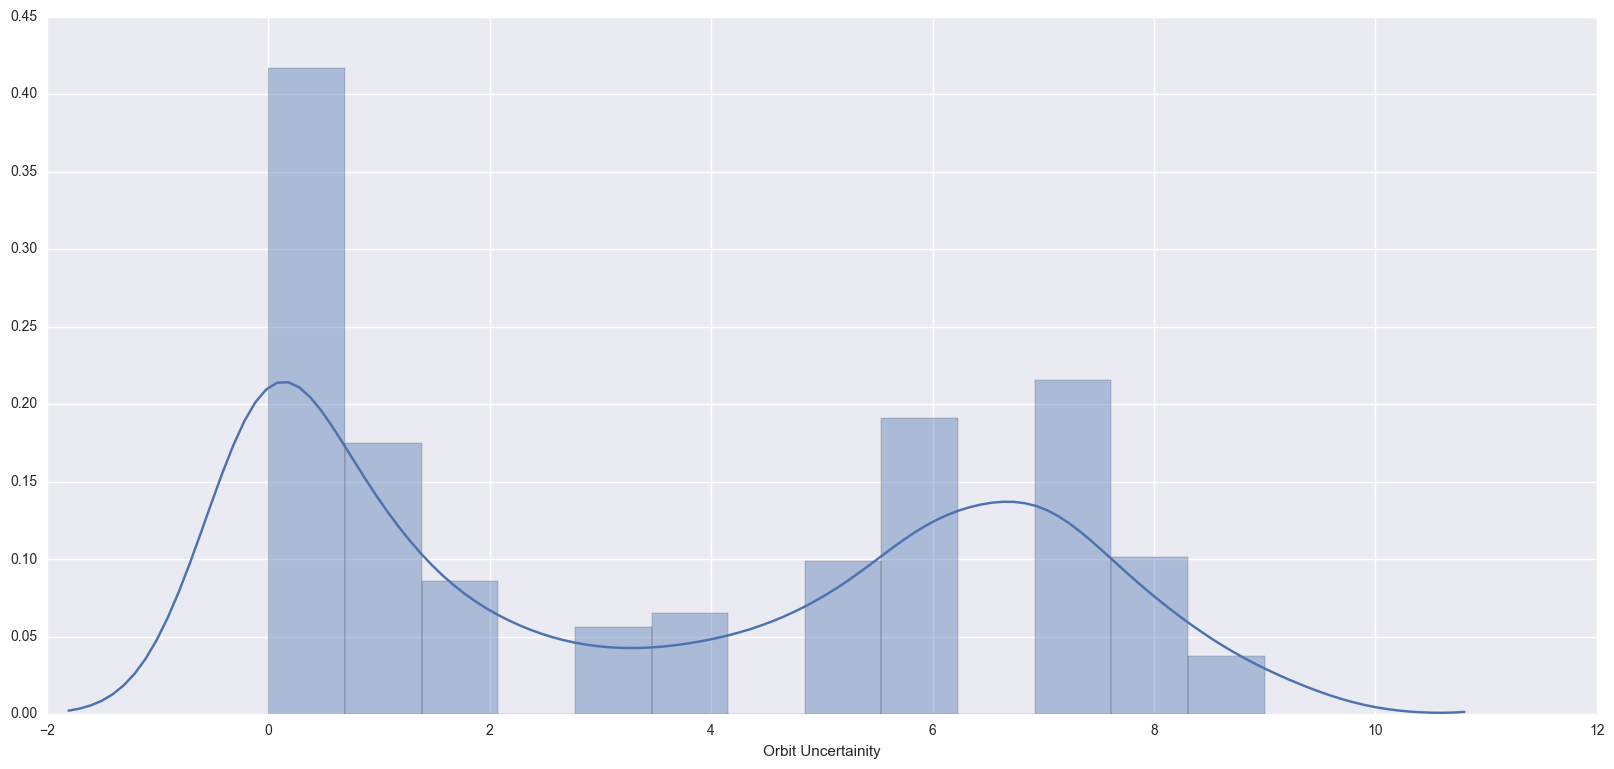

In [55]:
sns.distplot(nasa_data['Orbit Uncertainity'])
plt.show()

#### Observation:

This is a bi-model distribution and the data can reveal a shift in the process.For Processes that display this distribution, it is normally understood that there are 2 independent sources of Variation that result in Peaks within the data.


/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


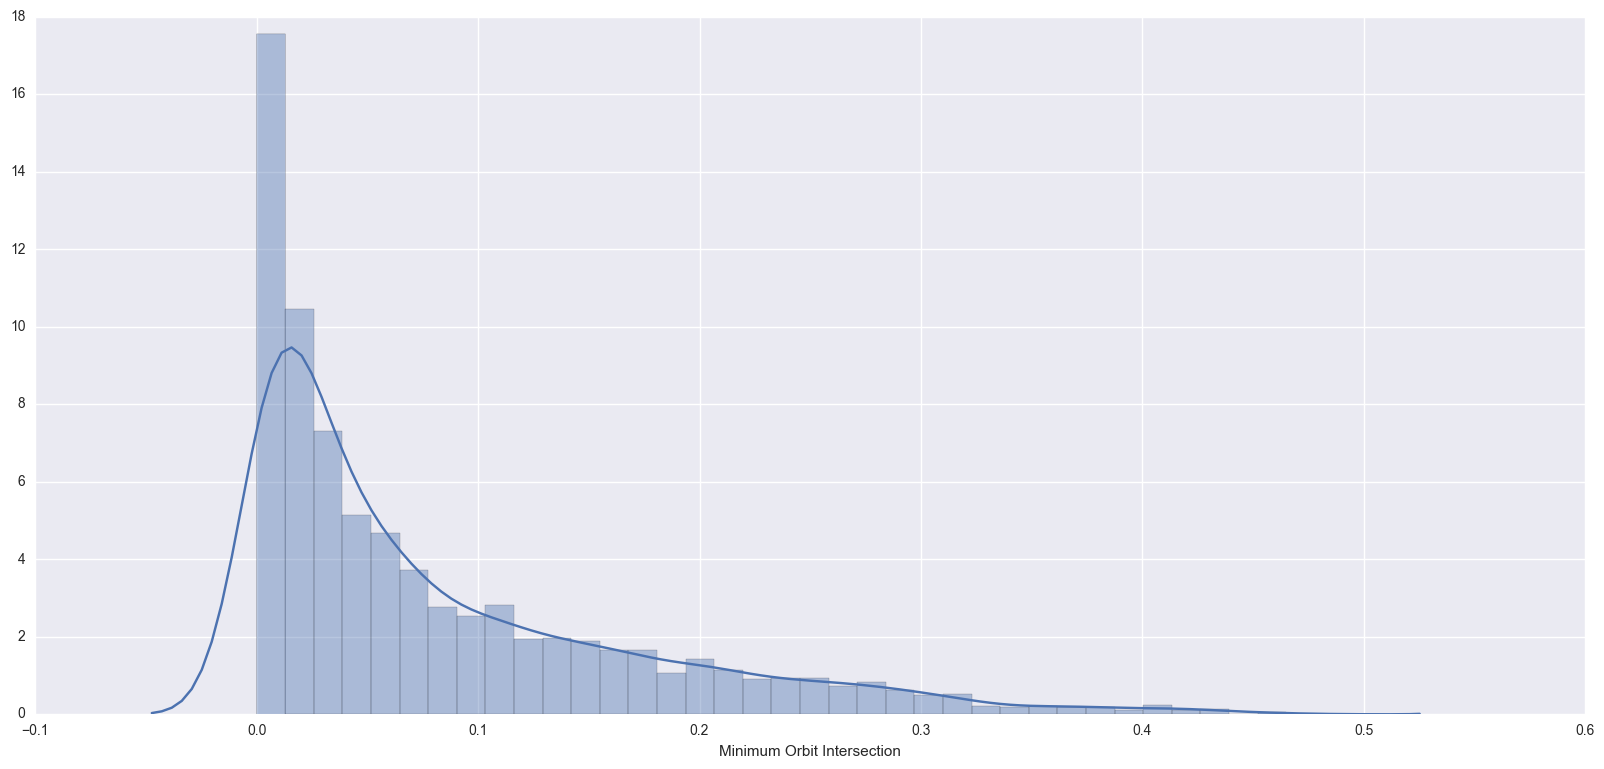

In [56]:
sns.distplot(nasa_data['Minimum Orbit Intersection'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


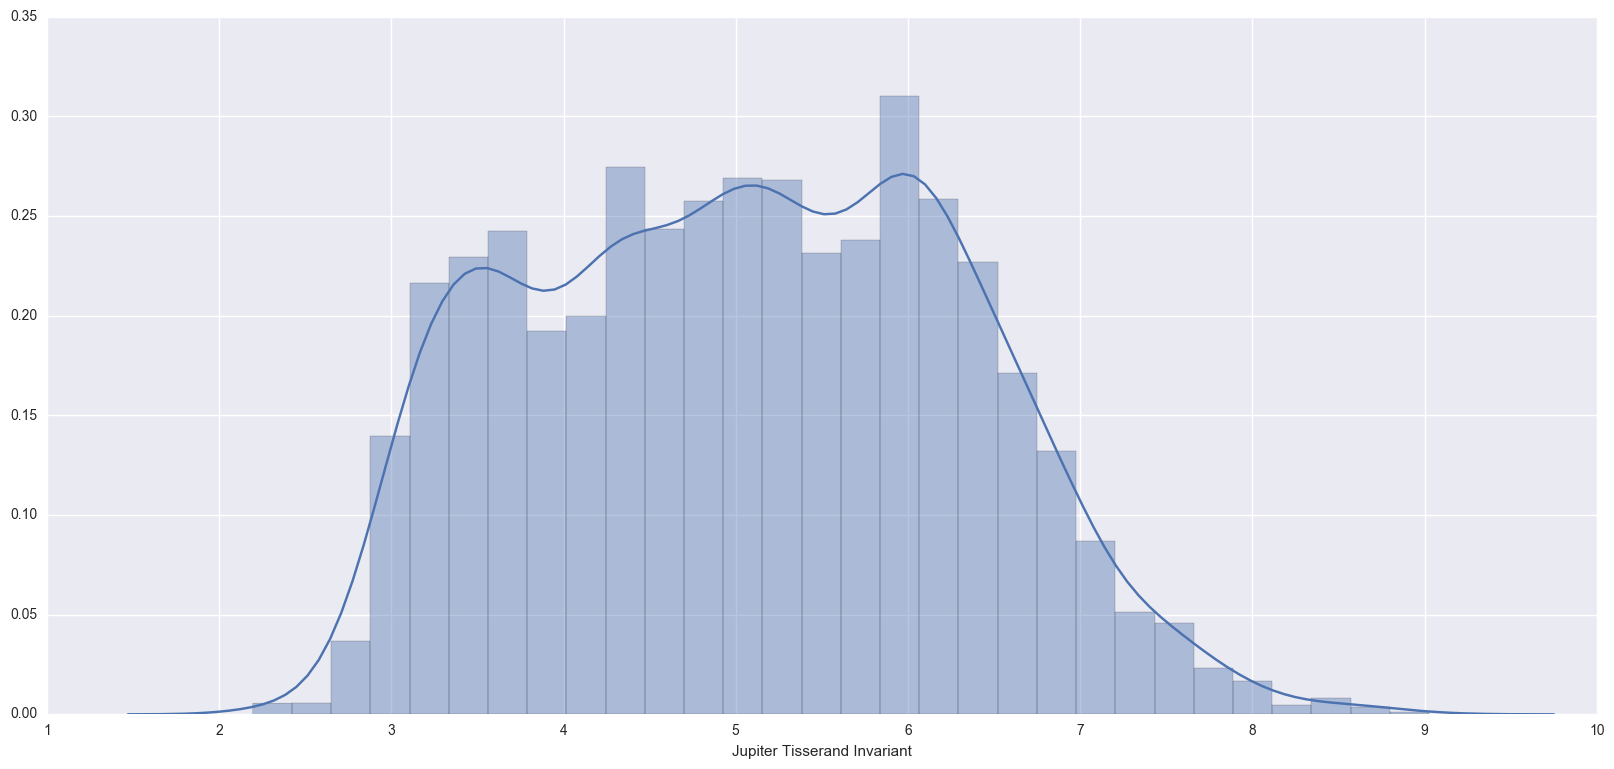

In [57]:
sns.distplot(nasa_data['Jupiter Tisserand Invariant'])
plt.show()

#### Observation:
The plateau might be called a “multimodal distribution.” Several processes with normal distributions are combined. Because there are many peaks close together, the top of the distribution resembles a plateau.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


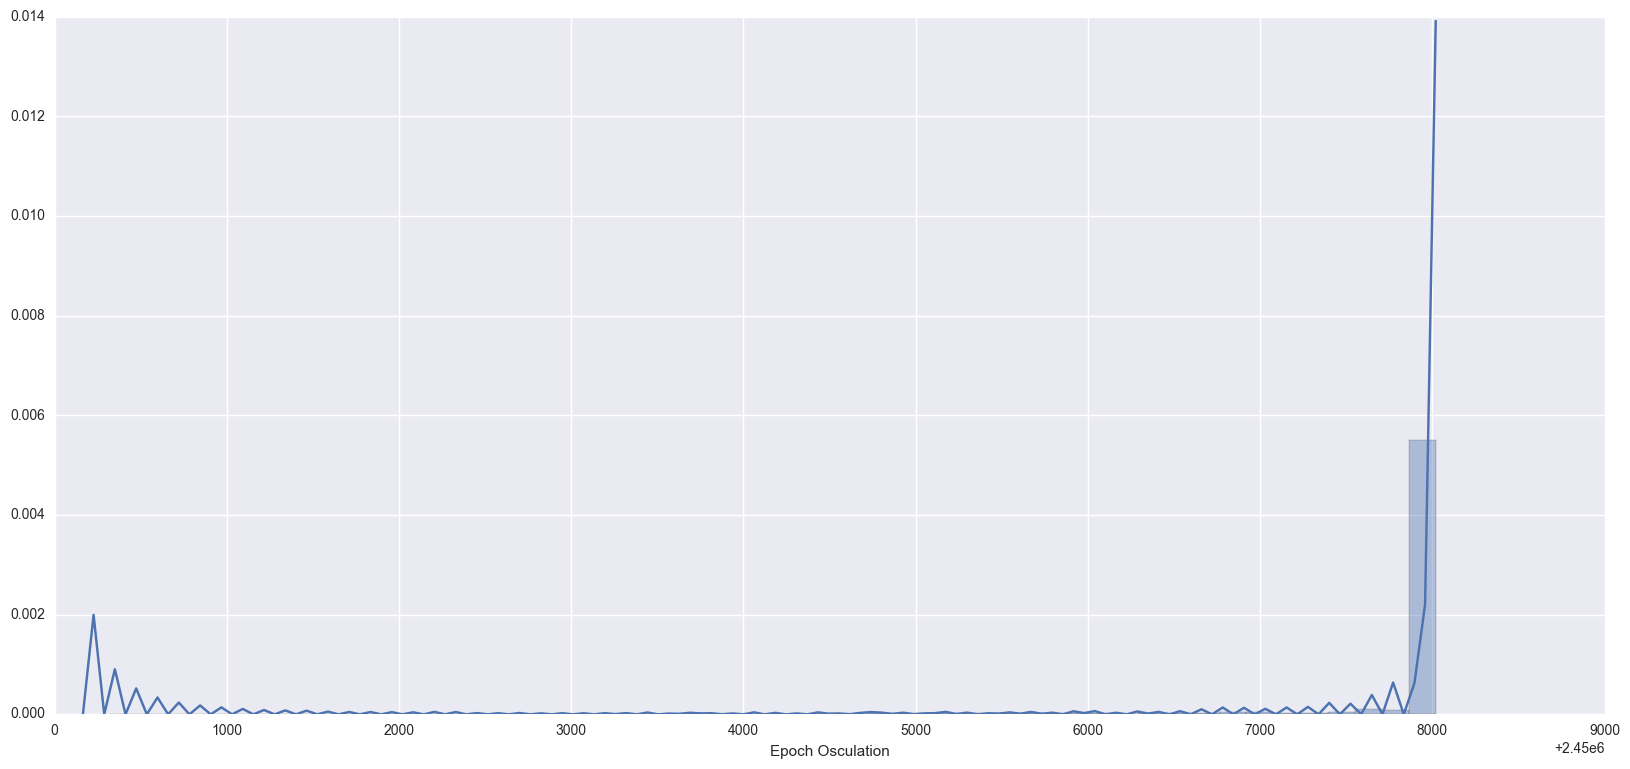

In [58]:
sns.distplot(nasa_data['Epoch Osculation'])
plt.show()

#### Observation:

This is a bi-model distribution and the data can reveal a shift in the process.For Processes that display this distribution, it is normally understood that there are 2 independent sources of Variation that result in Peaks within the data.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


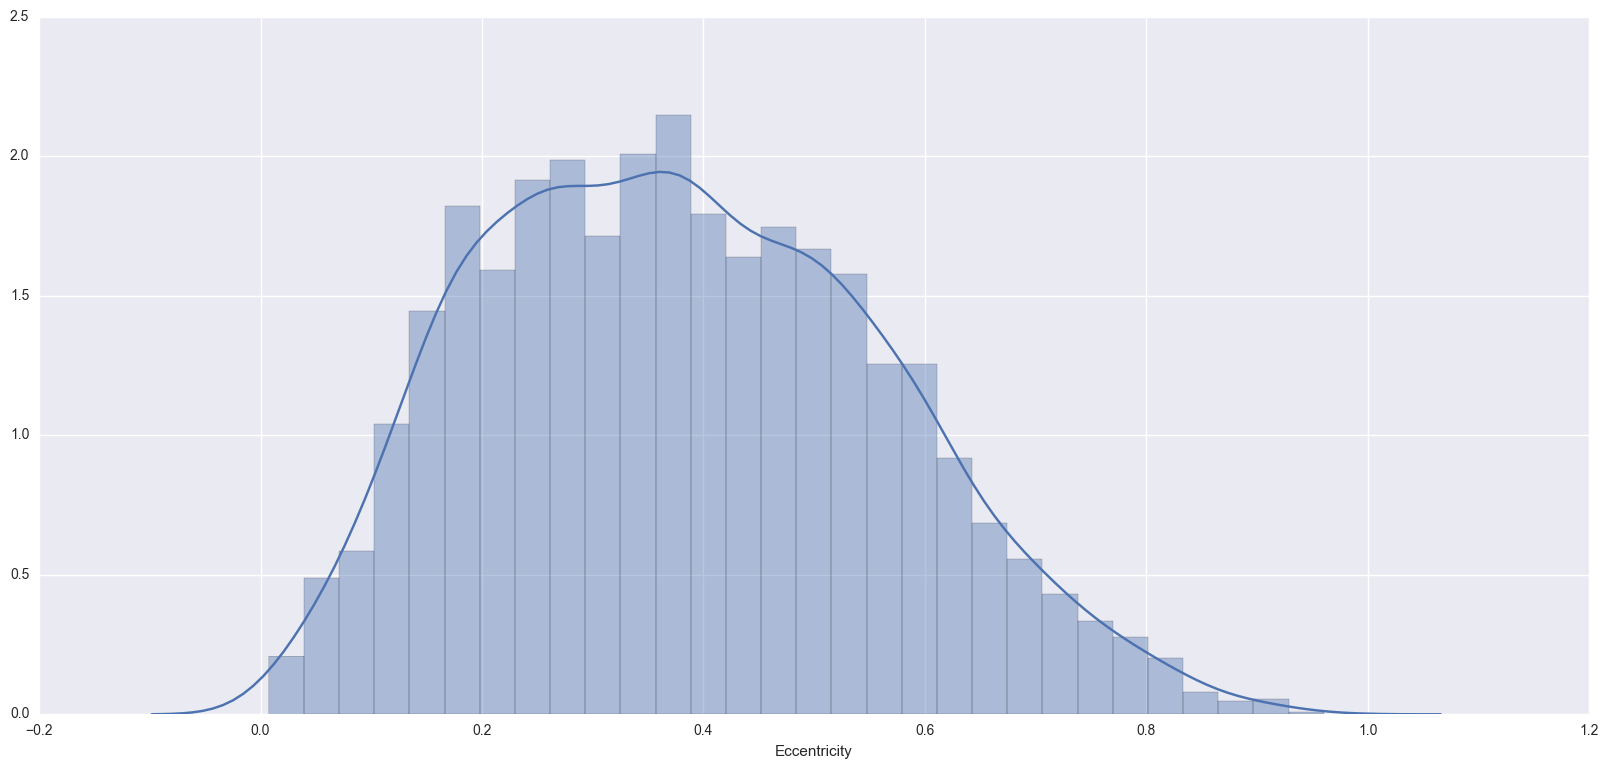

In [59]:
sns.distplot(nasa_data['Eccentricity'])
plt.show()

#### Observation:

This is normal distribution with a bell-shaped curve.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


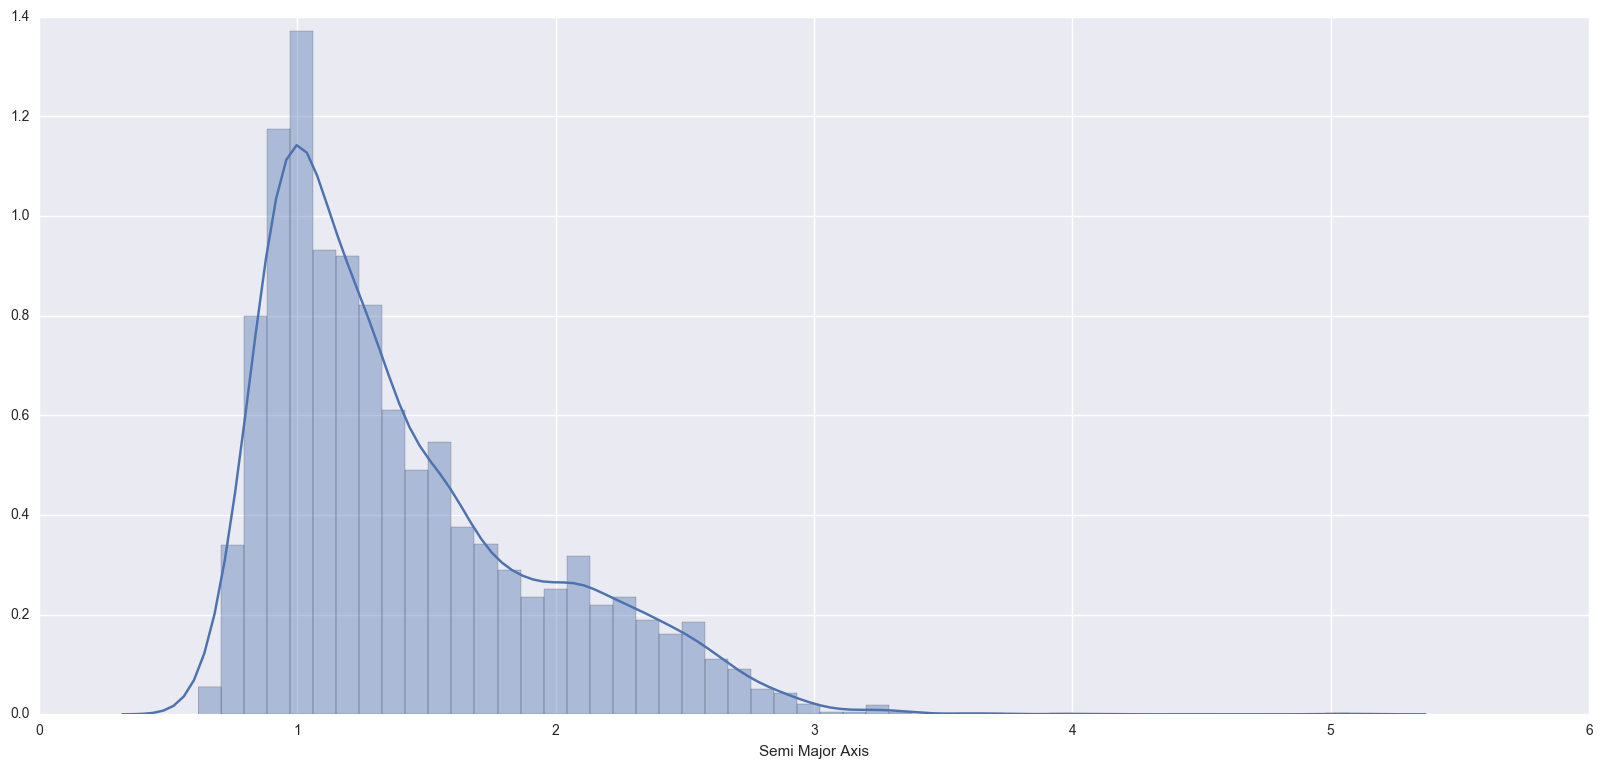

In [60]:
sns.distplot(nasa_data['Semi Major Axis'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


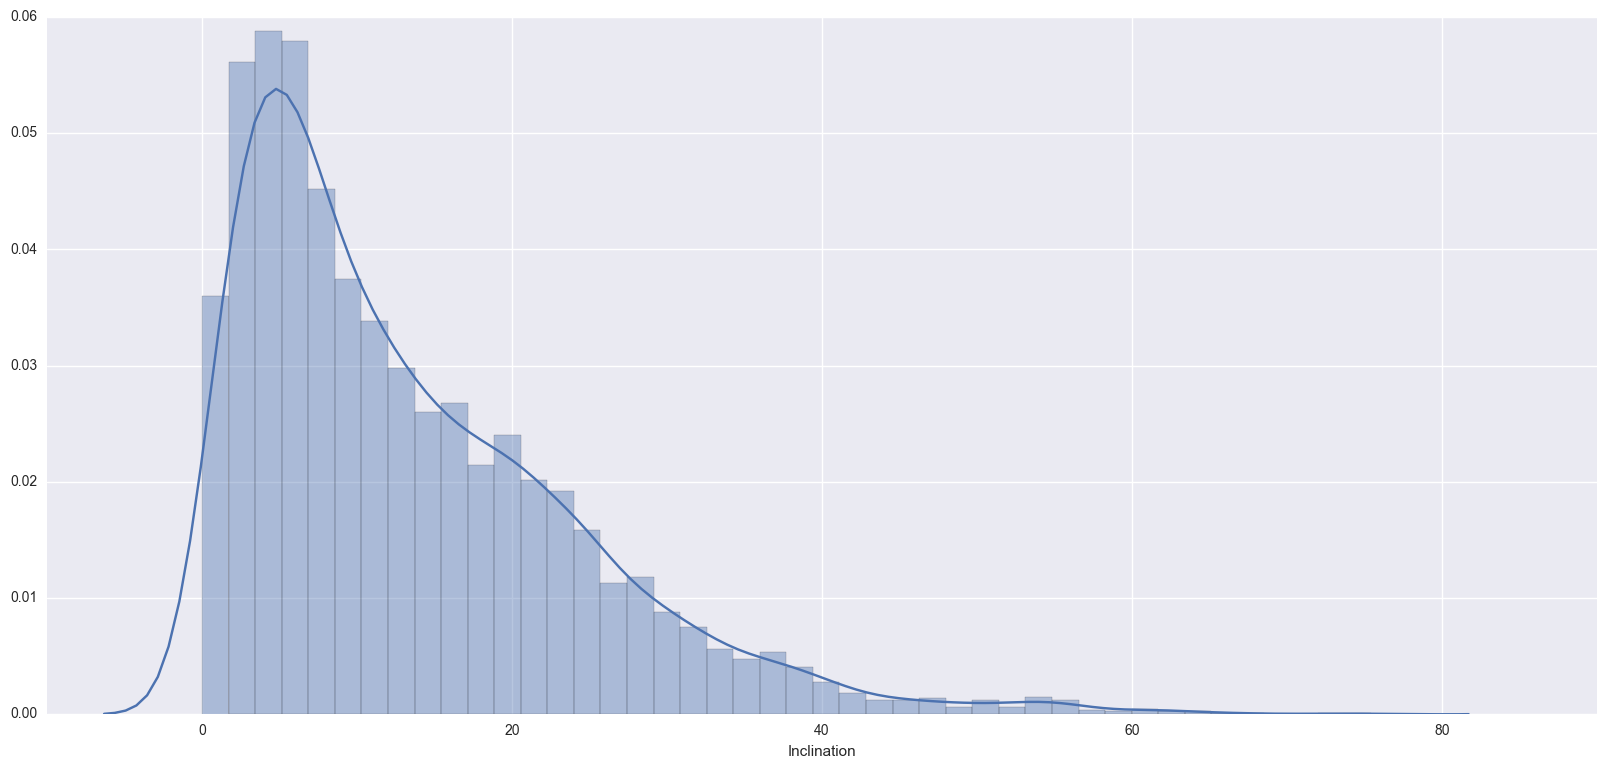

In [61]:
sns.distplot(nasa_data['Inclination'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


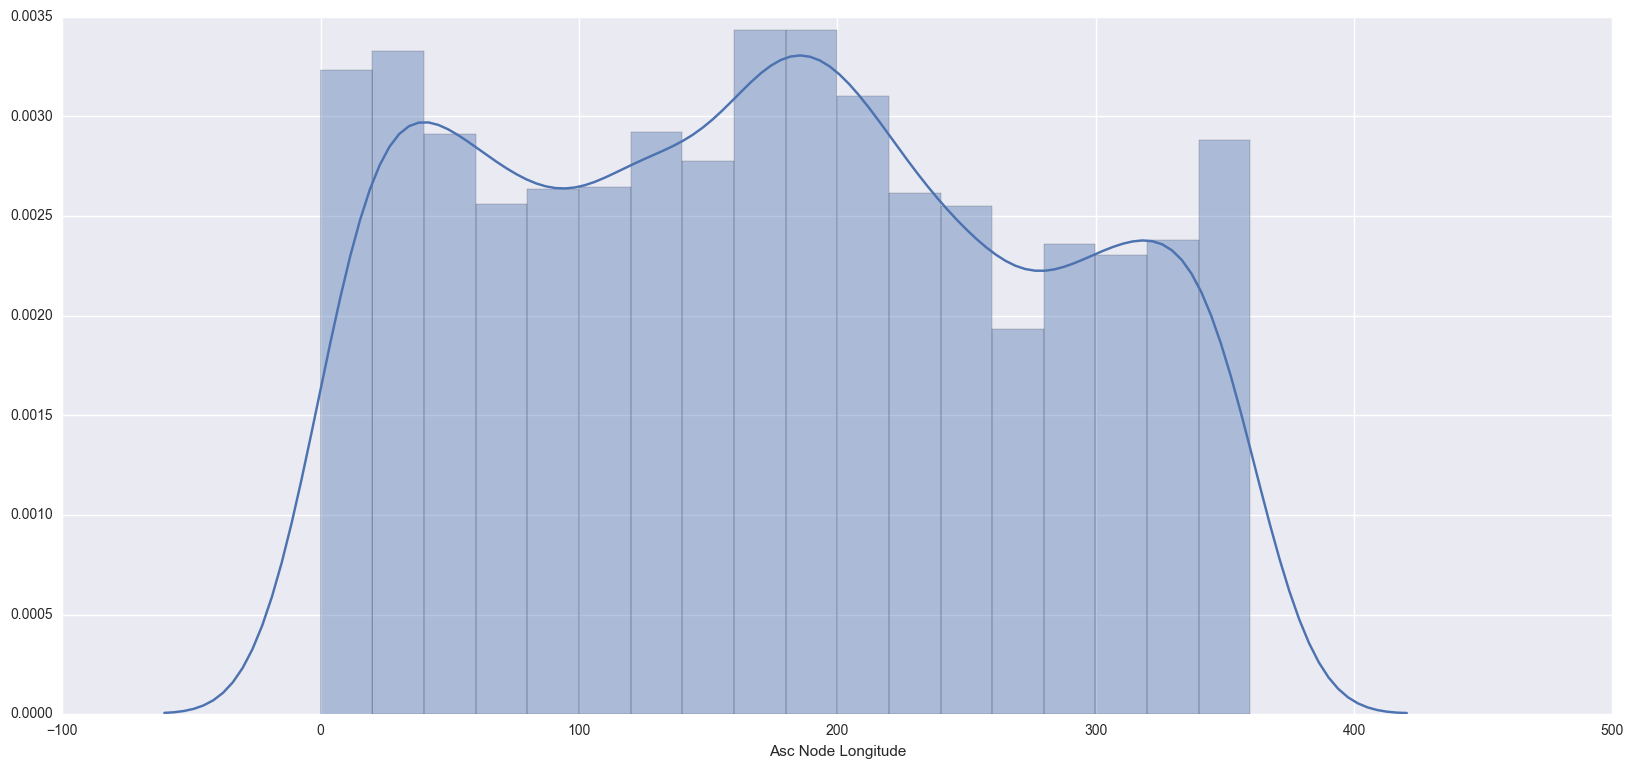

In [62]:
sns.distplot(nasa_data['Asc Node Longitude'])
plt.show()

#### Observation:
The plateau might be called a “multimodal distribution.” Several processes with normal distributions are combined. Because there are many peaks close together, the top of the distribution resembles a plateau.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


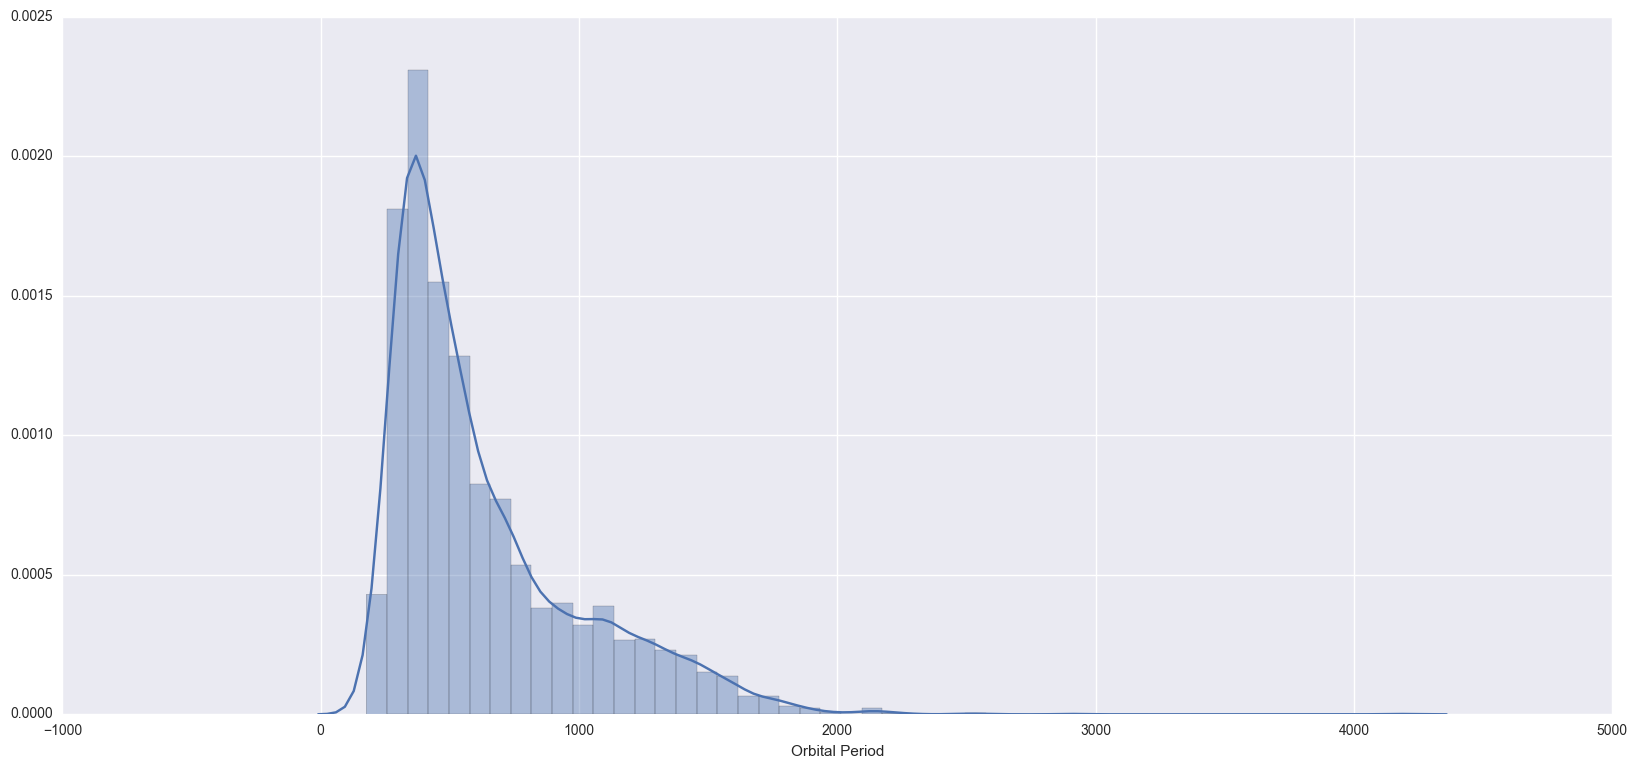

In [63]:
sns.distplot(nasa_data['Orbital Period'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


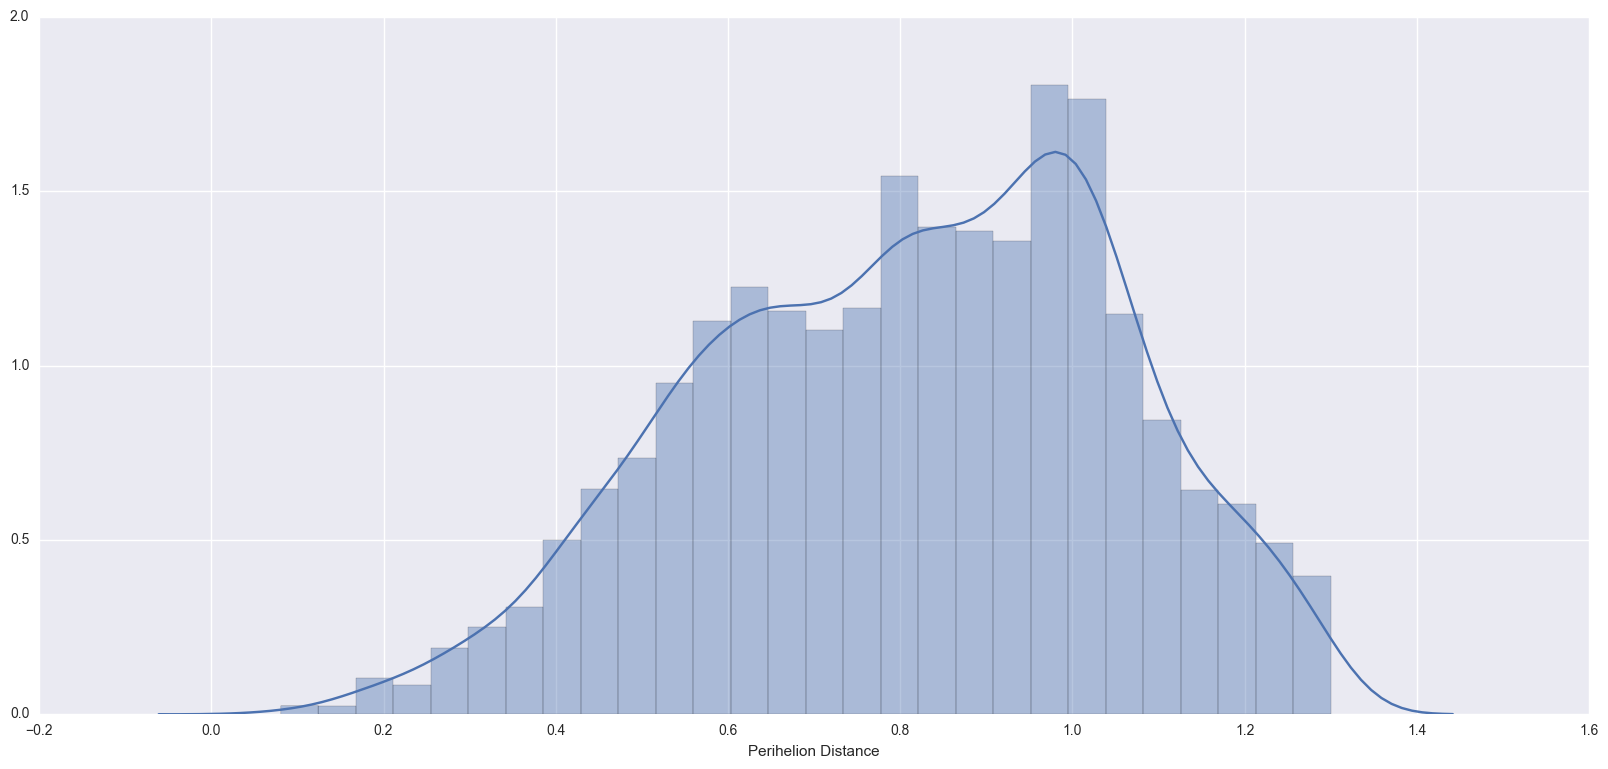

In [64]:
sns.distplot(nasa_data['Perihelion Distance'])
plt.show()

##### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


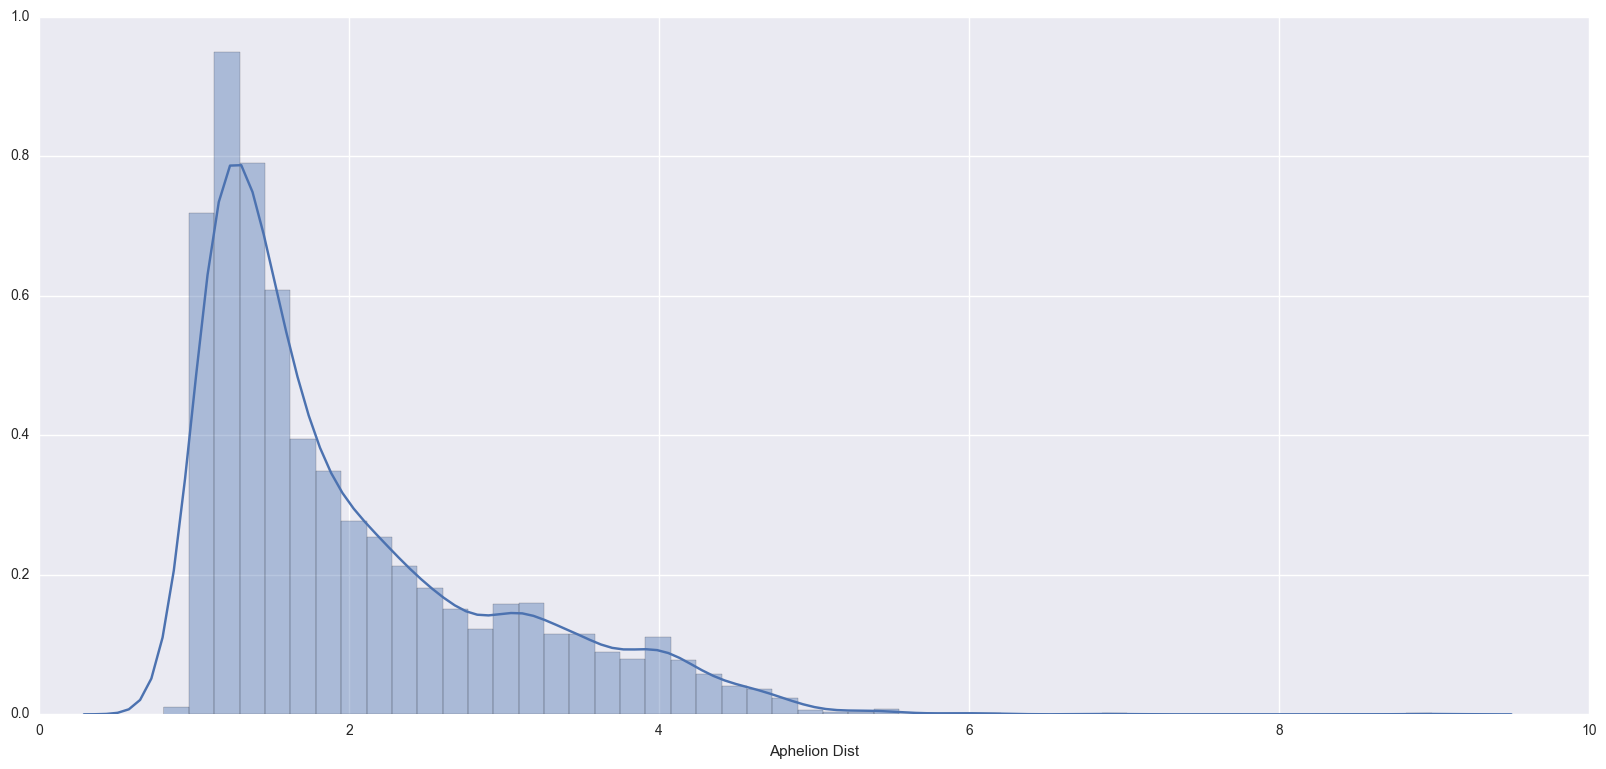

In [65]:
sns.distplot(nasa_data['Aphelion Dist'])
plt.show()

#### Observation: 

Non-Normality – Histogram:  a right-skewed distribution, plotted as a histogram. The histogram is not bell-shaped, indicating that the distribution is not normal.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


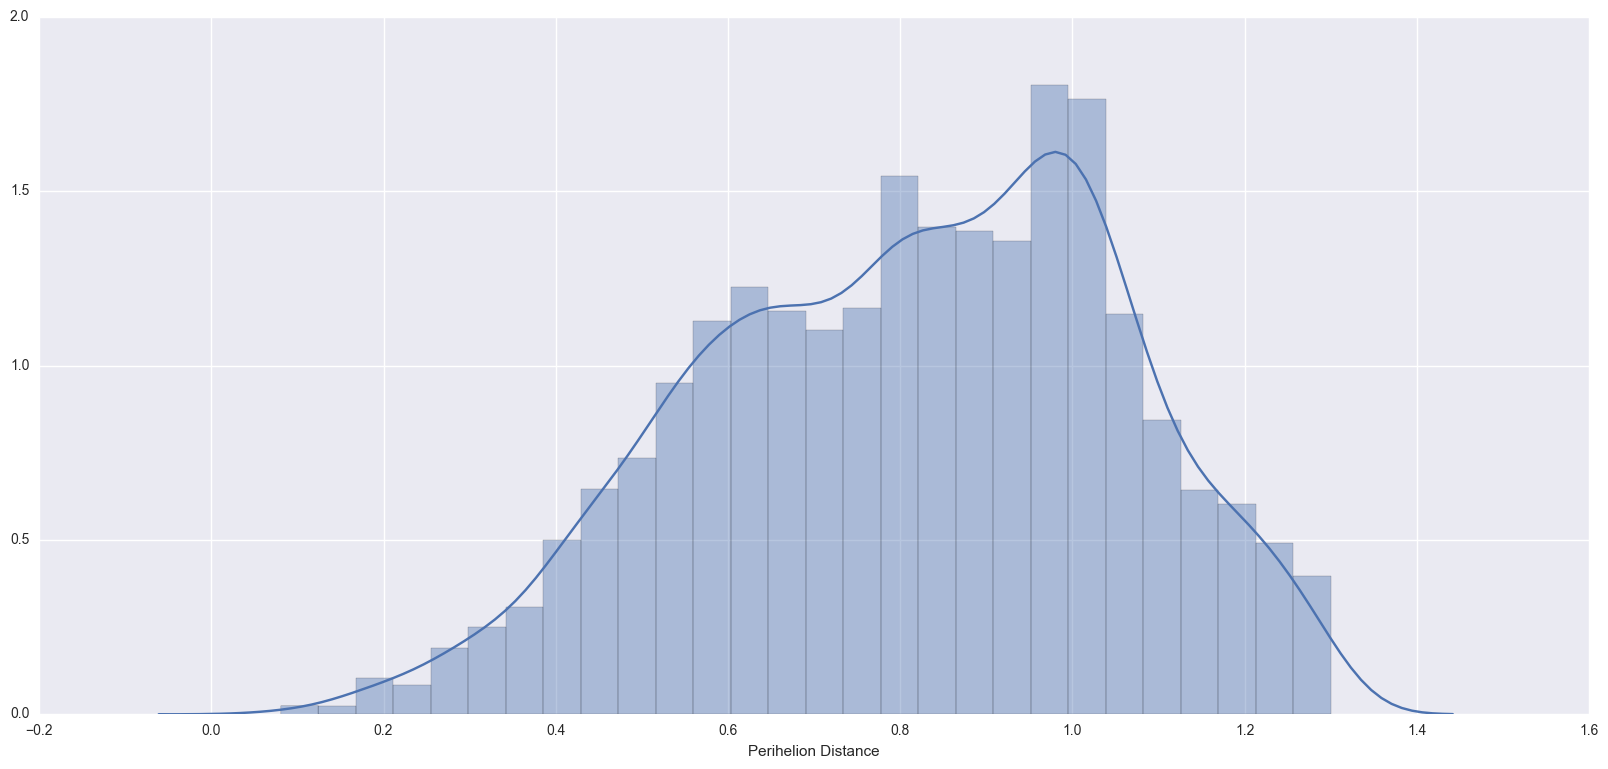

In [66]:
sns.distplot(nasa_data['Perihelion Distance'])
plt.show()

#### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


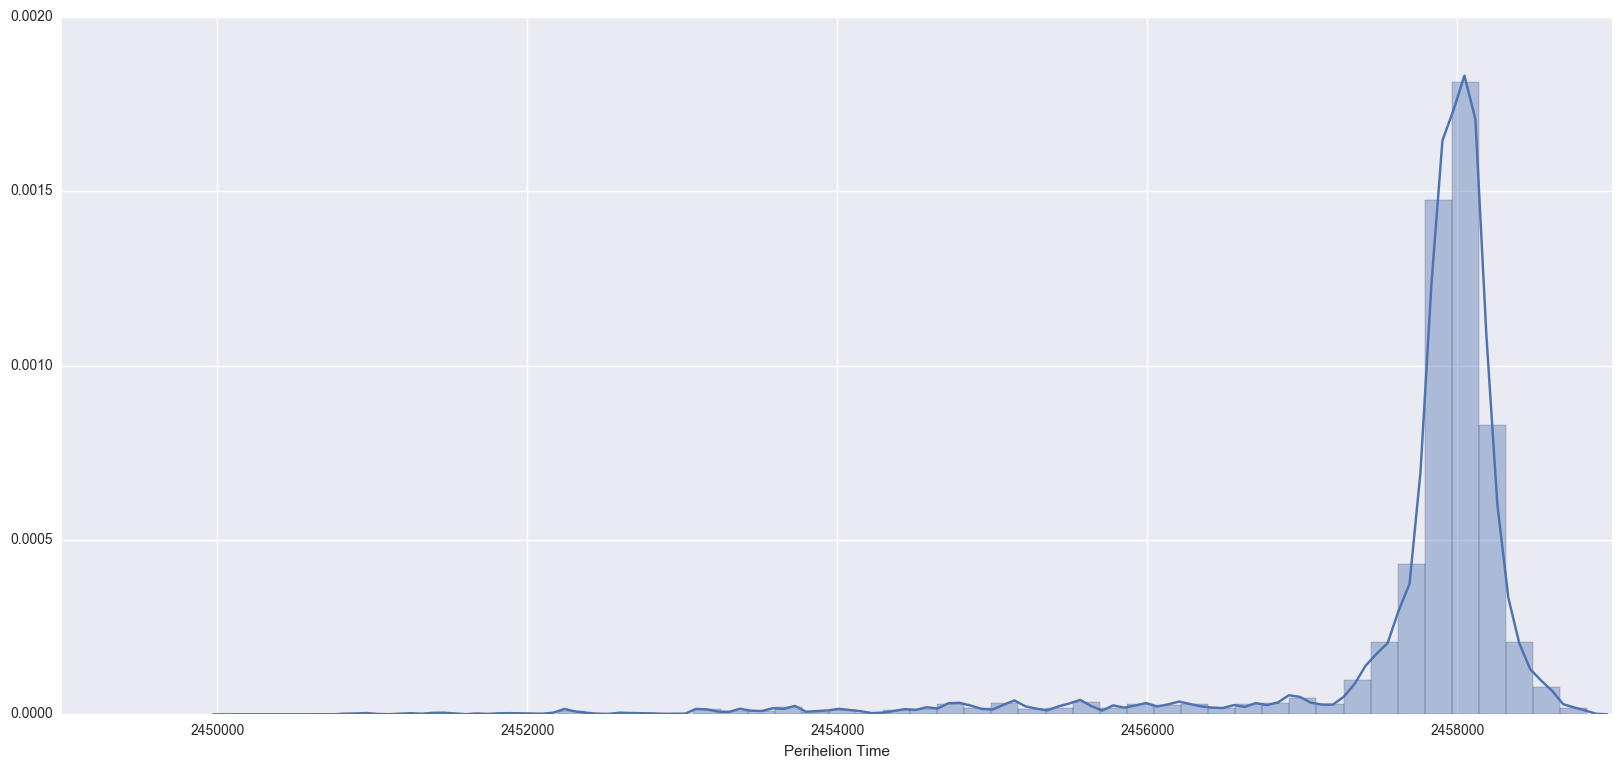

In [67]:
sns.distplot(nasa_data['Perihelion Time'])
plt.show()

#### Observation:

This is a bi-model distribution and the data can reveal a shift in the process.For Processes that display this distribution, it is normally understood that there are 2 independent sources of Variation that result in Peaks within the data.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


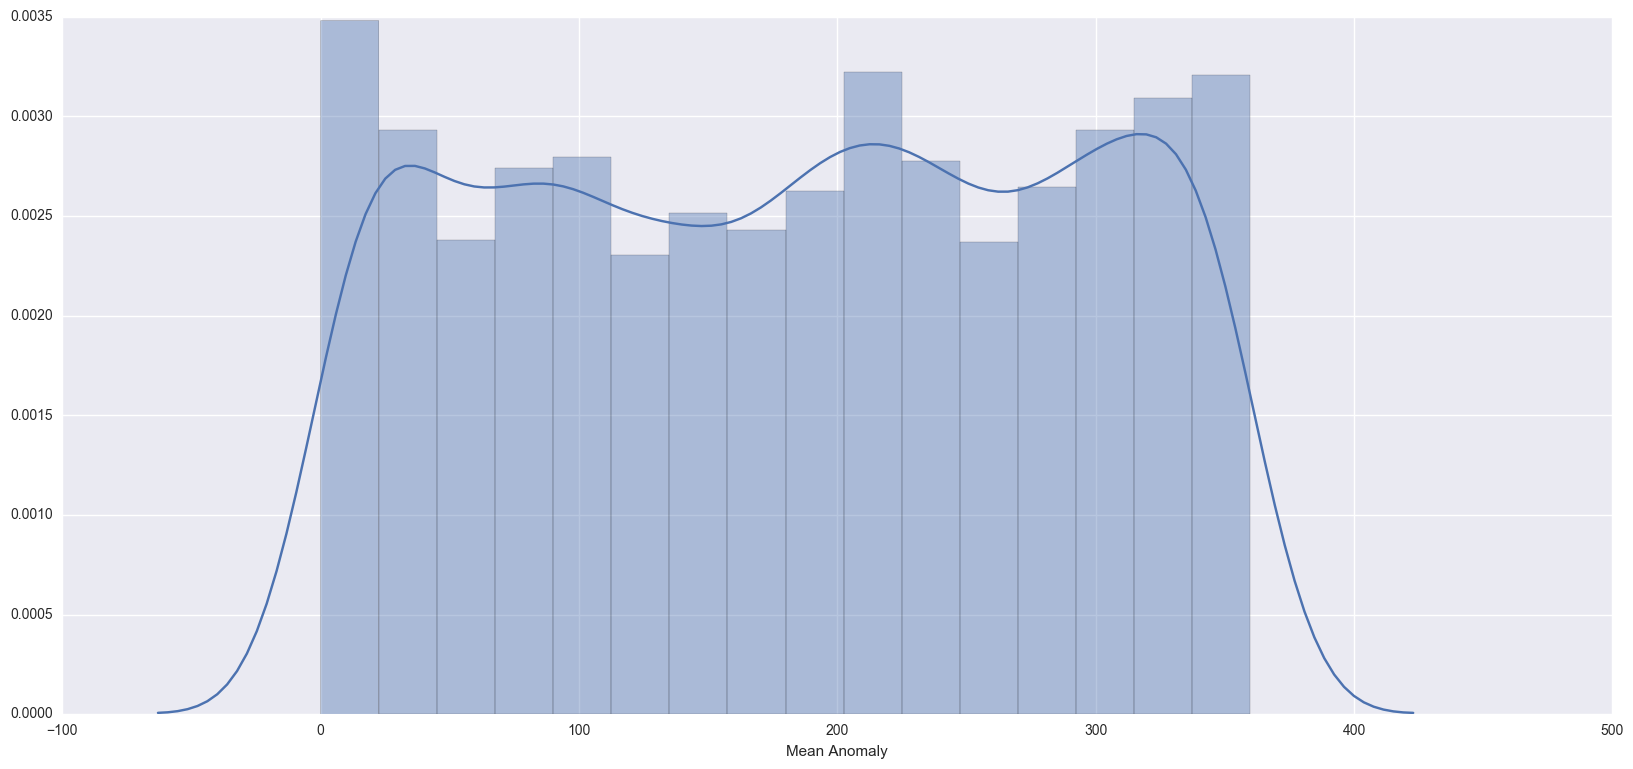

In [68]:
sns.distplot(nasa_data['Mean Anomaly'])
plt.show()

#### Observation:
The plateau might be called a “multimodal distribution.” Several processes with normal distributions are combined. Because there are many peaks close together, the top of the distribution resembles a plateau.

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


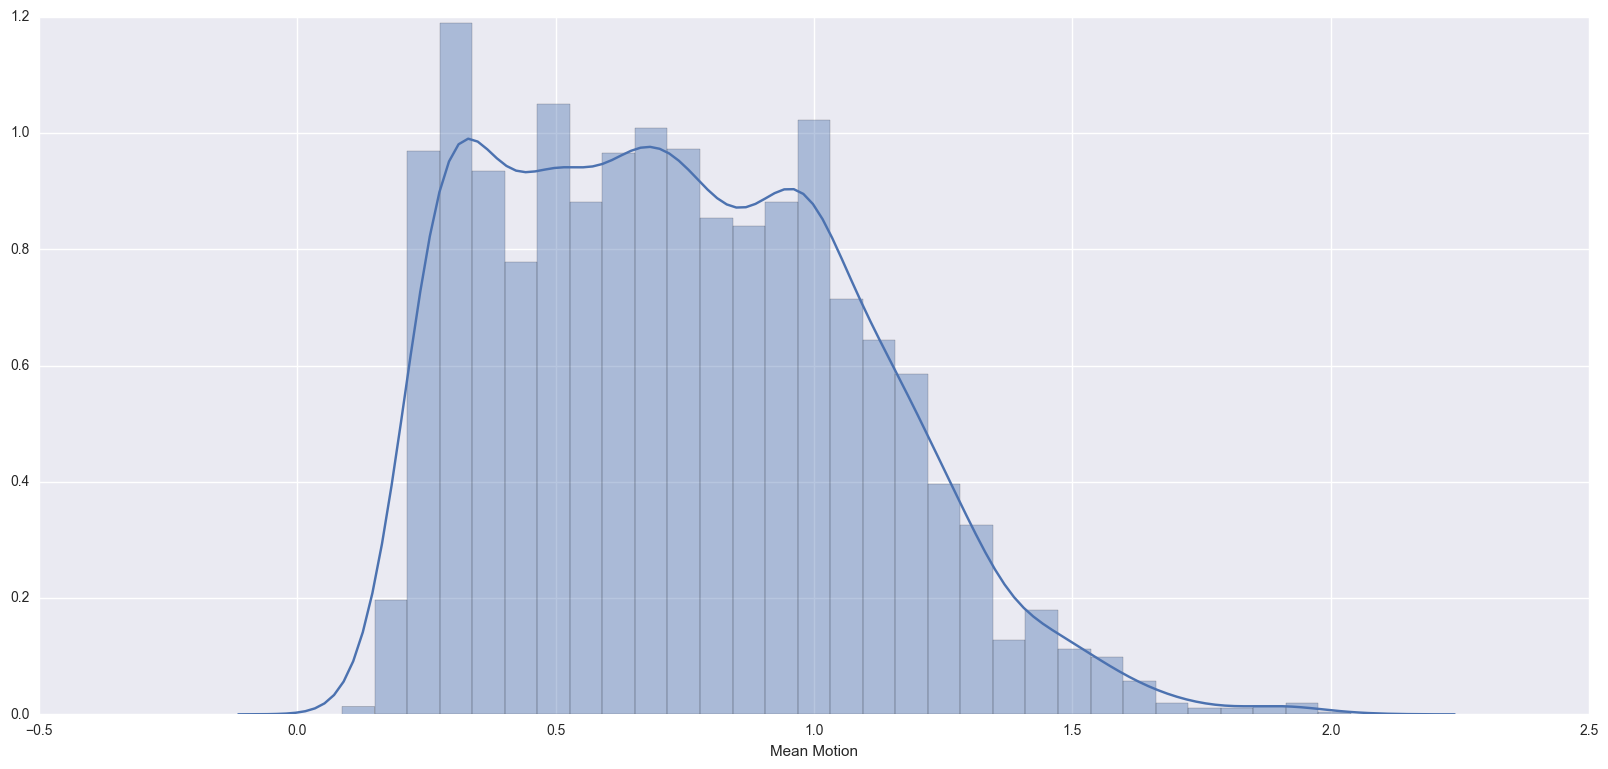

In [69]:
sns.distplot(nasa_data['Mean Motion'])
plt.show()

#### Observation:
Approximately Normal – Histogram: This histogram a normal distribution The histogram looks somewhat bell-shaped, indicating normality.

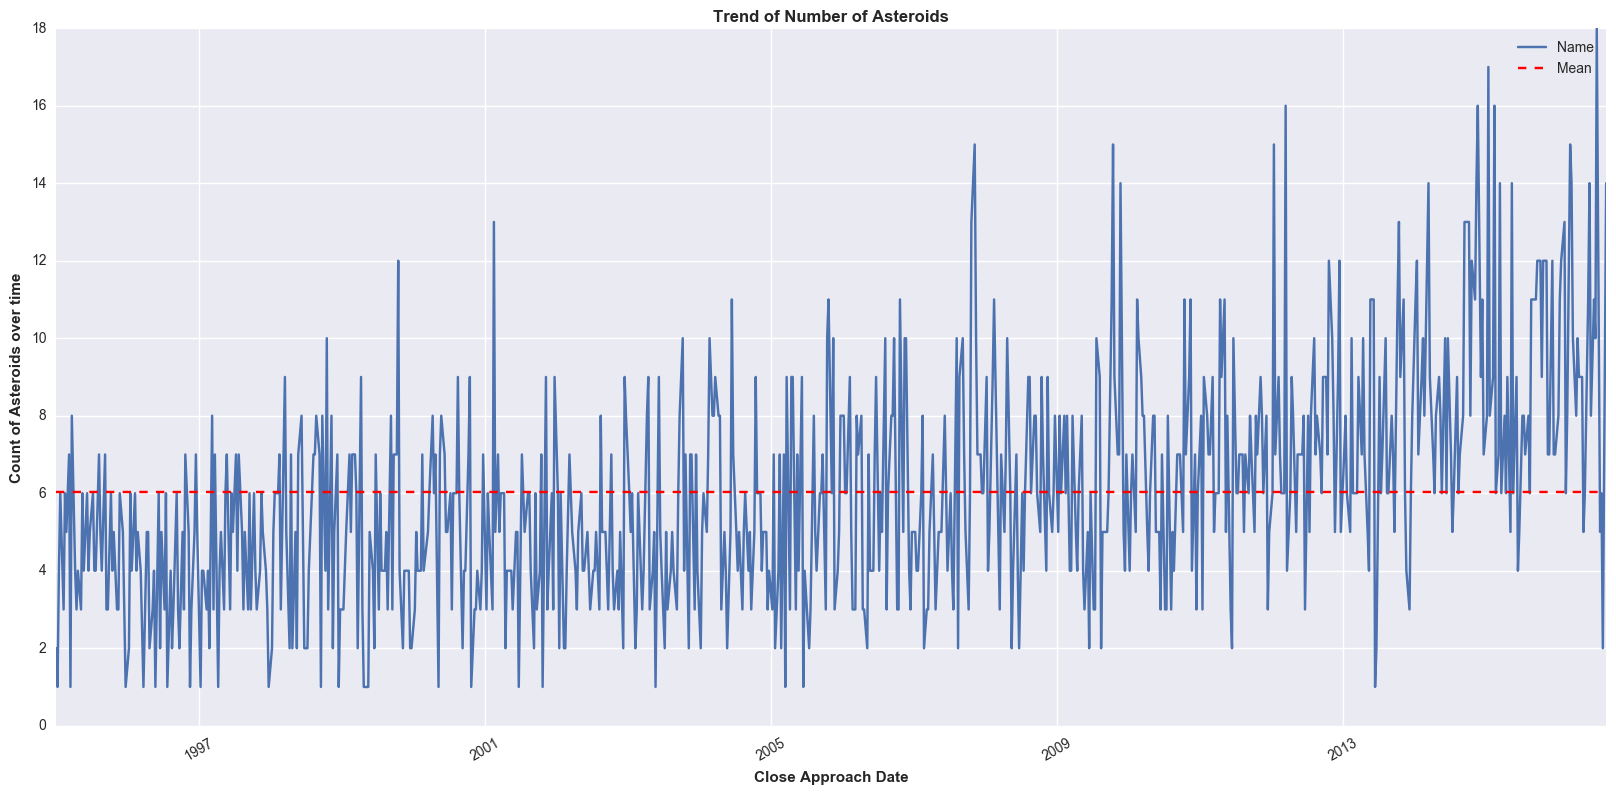

In [71]:
nasa_data.sort_values(by="Close Approach Date", inplace=True)
nasa_data['Close Approach Date'] = pd.to_datetime(nasa_data["Close Approach Date"], format='%Y-%m-%d')

name_count=nasa_data.groupby(['Close Approach Date'],as_index=False).count()

plt.plot(name_count['Close Approach Date'],name_count['Name'])
plt.xlabel("Close Approach Date",fontweight="bold")
plt.ylabel("Count of Asteroids over time",fontweight="bold")
plt.title("Trend of Number of Asteroids",fontweight="bold")
plt.xticks(rotation=30)
mean = name_count['Name'].mean()
plt.axhline(mean, color='r', linestyle='--',label='Mean')
plt.legend()
plt.show()
print()

#### Observation:

This graph shows number of asteroids over time(year). The average number of asteroids are 6.

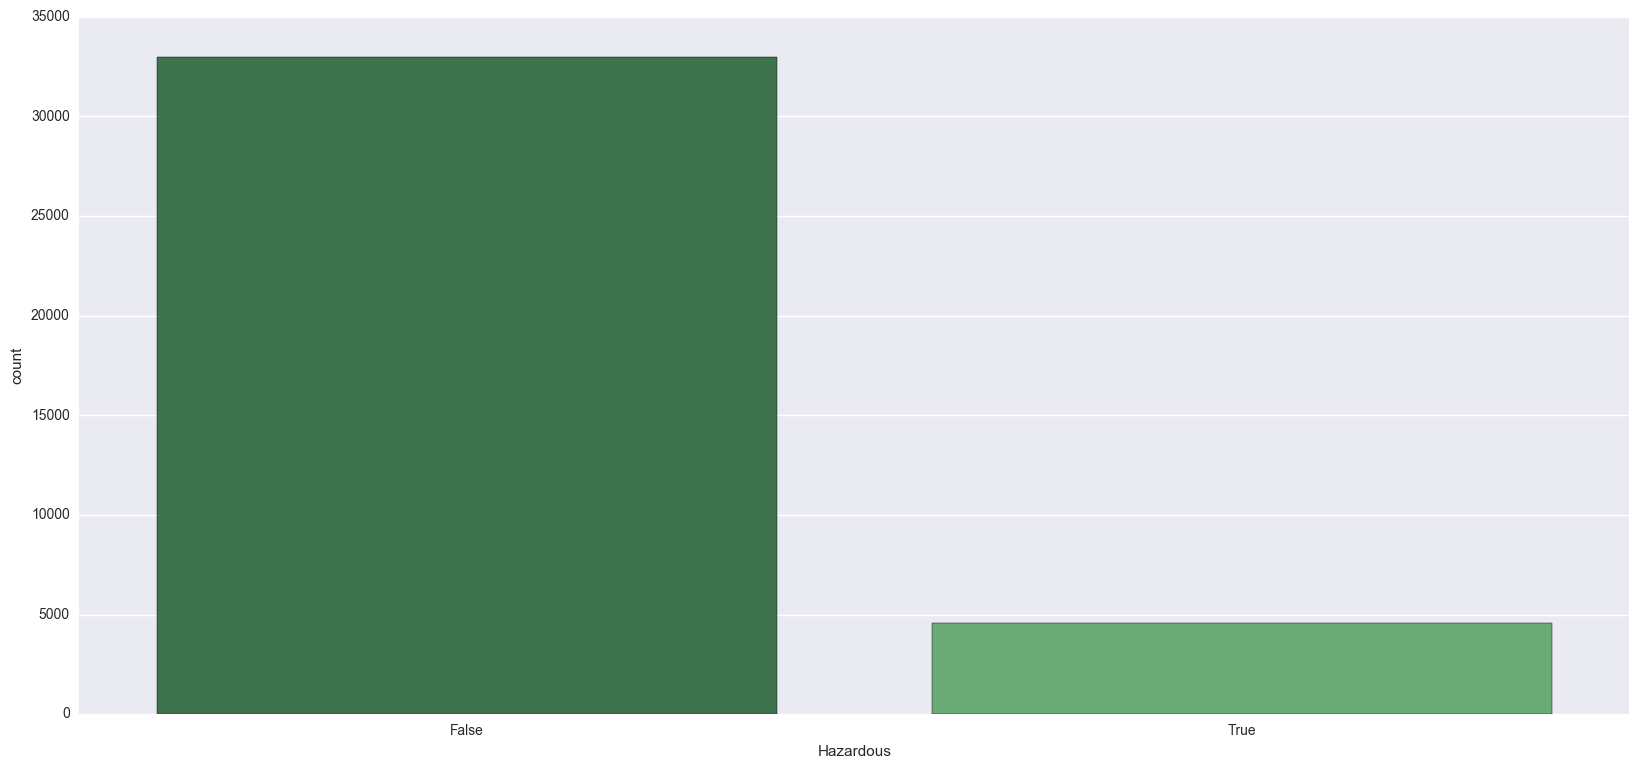

In [119]:
dfDummy=nasa_data[['Name','Hazardous']]
sns.countplot(x="Hazardous", data=nasa_data,palette="Greens_d")
plt.show()

#### Observation:

The total number of asteroid which are not hazardous are 34000 and hazardous are 4000

### Correlation between data
* Are any of the columns correlated?

                              Neo Reference ID      Name  Absolute Magnitude  \
Neo Reference ID                      1.000000  1.000000            0.602381   
Name                                  1.000000  1.000000            0.602381   
Absolute Magnitude                    0.602381  0.602381            1.000000   
Est Dia in KM(min)                   -0.499821 -0.499821           -0.613482   
Est Dia in KM(max)                   -0.499821 -0.499821           -0.613482   
Est Dia in M(min)                    -0.499821 -0.499821           -0.613482   
Est Dia in M(max)                    -0.499821 -0.499821           -0.613482   
Est Dia in Miles(min)                -0.499821 -0.499821           -0.613482   
Est Dia in Miles(max)                -0.499821 -0.499821           -0.613482   
Est Dia in Feet(min)                 -0.499821 -0.499821           -0.613482   
Est Dia in Feet(max)                 -0.499821 -0.499821           -0.613482   
Epoch Date Close Approach             0.

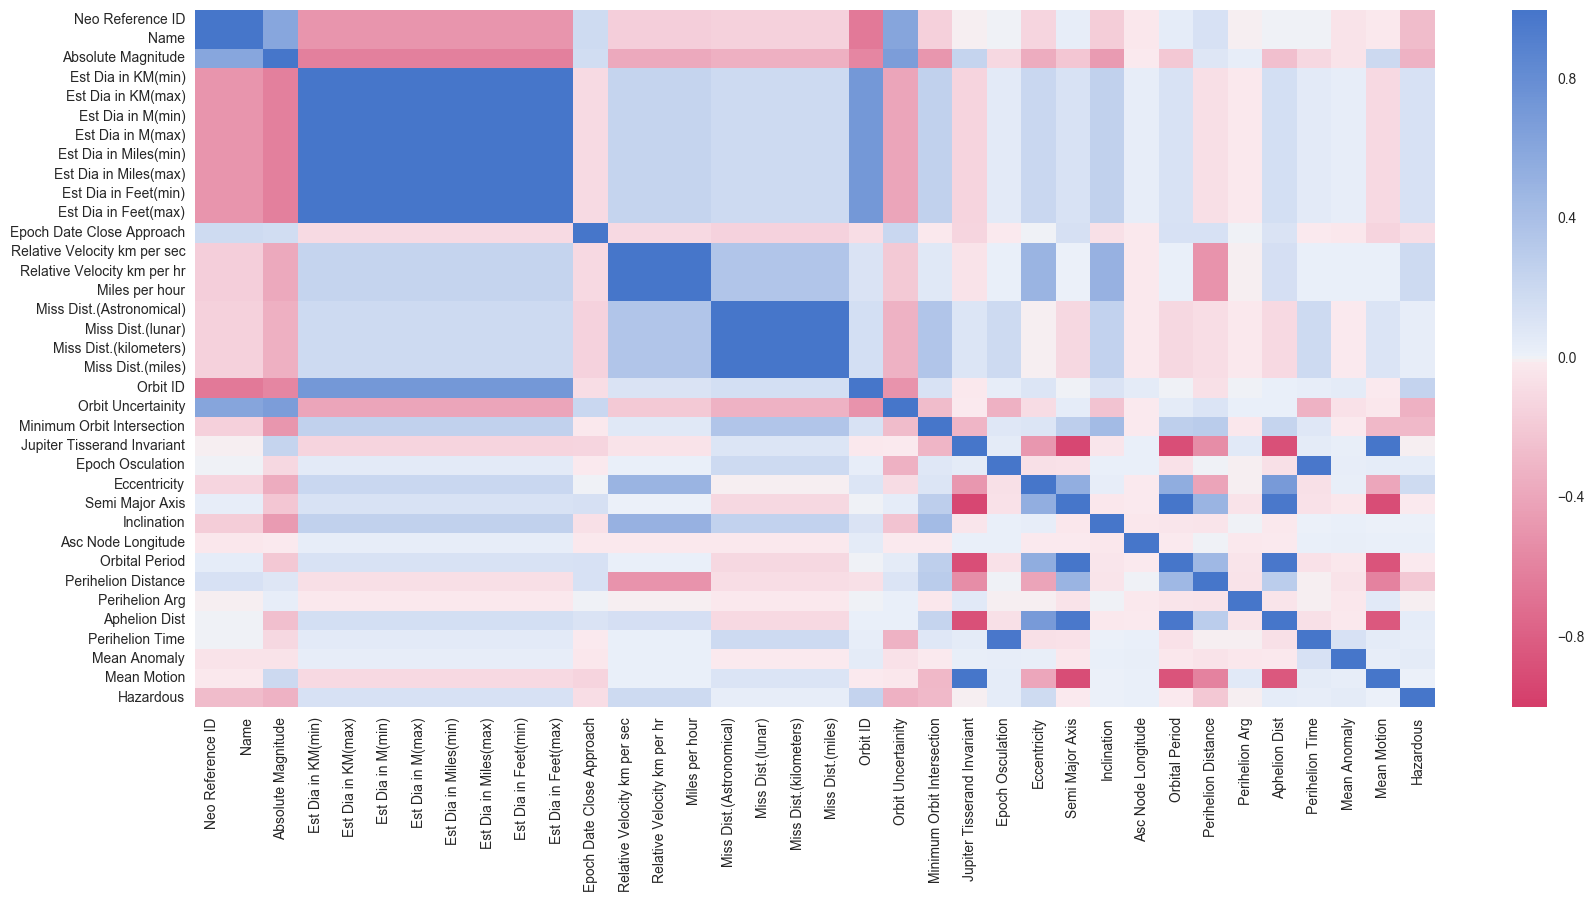

In [81]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = nasa_data[['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous']].corr() 
print(correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

### Correlation between variables in the data: 
##### A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

From the correlation matrix and plot above, we can clearly see that there are many features correlated to other featues such as Jupiter Tisserand and Invariant is highly correlated with Mean Motion with a correlation of 0.992197.Similarly, Aphelion distance and Semi Major axis and so on(0.975646).

Which means that when Jupiter Tisserant and Invariant increases, mean motion increases too.